## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Reading the data

In [5]:
# LOADING THE GIVEN DATA SET
dt_orig=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Great Learning/CAPSTONE PROJECT/PD_modelling_dataset.xlsx')

In [6]:
#TO DISPLAY TOP 5 ROWS OF THE GIVEN DATA SET
dt_orig.head()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,acct_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129,0.00,0,0.00,0.00,0.00,0.00,1.00,1.00,NaN,1.00,NaN,20,12.69,8.33,Dietary supplements,Health & Beauty,1.00,31638.00,31638.00,no_match,0.15,2.00,0.00,0.00,13.00,14.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,178839.00,9.65
1,2635118,0.00,0,0.00,0.00,0.00,NaN,1.00,1.00,1.00,1.00,1.00,50,25.83,25.00,Books & Magazines,Entertainment,1.00,13749.00,13749.00,F+L,0.00,0.00,0.00,0.00,9.00,19.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,49014.00,13.18
2,4804232,0.00,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,22,20.00,18.00,Diversified entertainment,Entertainment,1.00,29890.00,29890.00,L1+F,0.07,1.00,0.00,0.00,11.00,0.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,124839.00,11.56
3,1442693,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,4.69,4.89,Diversified entertainment,Entertainment,1.00,40040.00,40040.00,F1+L,0.03,1.00,0.00,0.00,31.00,21.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,324676.00,15.75
4,4575322,0.00,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,25,13.00,13.00,Electronic equipment & Related accessories,Electronics,1.00,7100.00,7100.00,F+L,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,7100.00,12.70


In [7]:
dt_orig.tail()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,acct_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
99971,3115649,NaN,0,0.00,0.00,0.00,NaN,1.00,1.00,NaN,NaN,NaN,33,10.33,NaN,Electronic equipment & Related accessories,Electronics,1.00,35195.00,35195.00,F1+L,0.00,0.00,0.00,0.00,6.00,2.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,60127.00,10.77
99972,1744943,NaN,0,0.00,0.00,0.00,0.00,1.00,1.00,NaN,1.00,1.00,44,36.00,NaN,Body & Hair Care,Health & Beauty,1.00,4740.00,4740.00,F1+L,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,1.00,1.00,0.00,7948.00,0.00,4740.00,21.71
99973,4333001,NaN,45671,0.00,20.00,0.00,0.71,2.00,2.00,2.00,1.00,1.00,24,NaN,NaN,Jewelry & Watches,Jewelry & Accessories,1.00,1200.00,1200.00,Nick,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17447.00,19627.00,3100.00,2.19
99974,4648093,NaN,56102,0.00,0.00,0.00,0.06,1.00,2.00,1.00,2.00,2.00,31,17.50,NaN,Decoration & Art,Home & Garden,1.00,15000.00,15000.00,Nick,0.00,0.00,0.00,0.00,2.00,1.00,0.00,1.00,1.00,1.00,0.00,18339.00,56180.00,34785.00,9.73
99975,1247657,NaN,0,0.00,0.00,0.00,NaN,1.00,1.00,NaN,1.00,NaN,41,34.67,37.50,Dietary supplements,Health & Beauty,1.00,13246.00,14817.00,F1+L,0.00,0.00,0.00,0.00,2.00,2.00,1.00,2.00,2.00,2.00,0.00,0.00,0.00,30602.00,11.59


In [8]:
dt_orig.drop('userid',axis=1,inplace=True)

In [9]:
print('The shape of the given data set is {}, contains totally {} rows and {} columns'.format(dt_orig.shape, dt_orig.shape[0], dt_orig.shape[1]))

The shape of the given data set is (99976, 35), contains totally 99976 rows and 35 columns


In [10]:
dt_orig['default'].value_counts(normalize=True)*100

0.00   98.57
1.00    1.43
Name: default, dtype: float64

In [11]:
dt_orig['default'].isnull().value_counts()

False    89976
True     10000
Name: default, dtype: int64

In [12]:
for i in range(0,len(dt_orig.columns),5):
  print('The descriptive statistics for the variables {} to {}'.format(i+1,i+5))
  display(dt_orig.iloc[:,i:i+5].describe(include='all'))
  print('\n')

The descriptive statistics for the variables 1 to 5


,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m
count,89976.00,99976.00,88140.00,88140.00,88140.00
mean,0.01,12255.15,0.22,5.04,0.29
std,0.12,35481.48,5.81,22.86,2.93
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,0.00,4937.25,0.00,0.00,0.00
max,1.00,1128775.00,365.00,365.00,97.00




The descriptive statistics for the variables 6 to 10


,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m
count,40661.00,45603.00,45603.00,33215.00,42274.00
mean,1.33,1.04,1.17,1.34,1.19
std,26.48,0.20,0.42,0.58,0.44
min,0.00,1.00,1.00,1.00,1.00
25%,0.00,1.00,1.00,1.00,1.00
50%,0.15,1.00,1.00,1.00,1.00
75%,0.66,1.00,1.00,2.00,1.00
max,3914.00,4.00,4.00,4.00,4.00




The descriptive statistics for the variables 11 to 15


,acct_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category
count,39626.00,99976.00,76140.00,50671.00,99976
unique,NaN,NaN,NaN,NaN,57
top,NaN,NaN,NaN,NaN,Diversified entertainment
freq,NaN,NaN,NaN,NaN,38614
mean,1.25,36.02,17.97,14.99,NaN
std,0.51,13.00,12.75,10.30,NaN
min,1.00,18.00,0.00,0.00,NaN
25%,1.00,25.00,10.80,8.40,NaN
50%,1.00,34.00,14.91,13.00,NaN
75%,1.00,45.00,21.00,18.29,NaN




The descriptive statistics for the variables 16 to 20


,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email
count,99967,88942.00,88942.00,88942.00,88942
unique,12,NaN,NaN,NaN,8
top,Entertainment,NaN,NaN,NaN,F+L
freq,48779,NaN,NaN,NaN,35822
mean,NaN,0.87,9362.82,11419.73,NaN
std,NaN,0.34,13672.46,15431.75,NaN
min,NaN,0.00,0.00,0.00,NaN
25%,NaN,1.00,2390.00,3685.00,NaN
50%,NaN,1.00,6170.00,7720.00,NaN
75%,NaN,1.00,11400.00,13865.00,NaN




The descriptive statistics for the variables 21 to 25


,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m
count,70051.00,88942.00,88942.00,88942.00,88942.00
mean,0.11,0.63,0.06,0.06,7.79
std,0.29,1.61,0.38,0.36,16.74
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,3.00
75%,0.10,1.00,0.00,0.00,8.00
max,9.00,47.00,17.00,13.00,261.00




The descriptive statistics for the variables 26 to 30


,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months
count,88942.00,88942.00,88942.00,88942.00,88942.00
mean,6.85,0.48,0.82,1.07,1.25
std,16.07,1.40,0.72,0.78,0.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,1.00
50%,2.00,0.00,1.00,1.00,1.00
75%,7.00,0.00,1.00,2.00,2.00
max,313.00,42.00,3.00,5.00,5.00




The descriptive statistics for the variables 31 to 35


,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
count,88942.00,88942.00,88942.00,88942.00,88942.00
mean,3.60,10860.38,6615.02,41036.37,15.34
std,116.21,26630.74,19243.90,94596.85,5.03
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,3396.50,11.63
50%,0.00,0.00,0.00,17057.50,15.81
75%,0.00,8960.75,102.75,45739.50,19.55
max,16411.00,571475.00,341859.00,2962870.00,24.00


The variable "merchant_category" will be removed due to high cardinality - 57 unique merchant categories.

In [13]:
#TOTAL NUMBER OF UNIQUE VALUE IN EACH COLUMN
#dt_orig.nunique().sort_values()

## Functions defined

In [14]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})


        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()*100

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()*100

        #Calculate the population % in each group.
        d['Pop %'] = (d['N']/d['N'].sum())*100

        #Calculate the bad rate in each group.
        d['default rate'] = (d['Events']/d['N'])*100


        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [15]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_top_positive_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    #au_corr.reset_index(level=[0,1],inplace=True)
    return au_corr[0:n]

def get_top_negative_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    #au_corr.reset_index(level=[0,1],inplace=True)
    return au_corr[0:n]



## Univariate and Bivariate Analysis

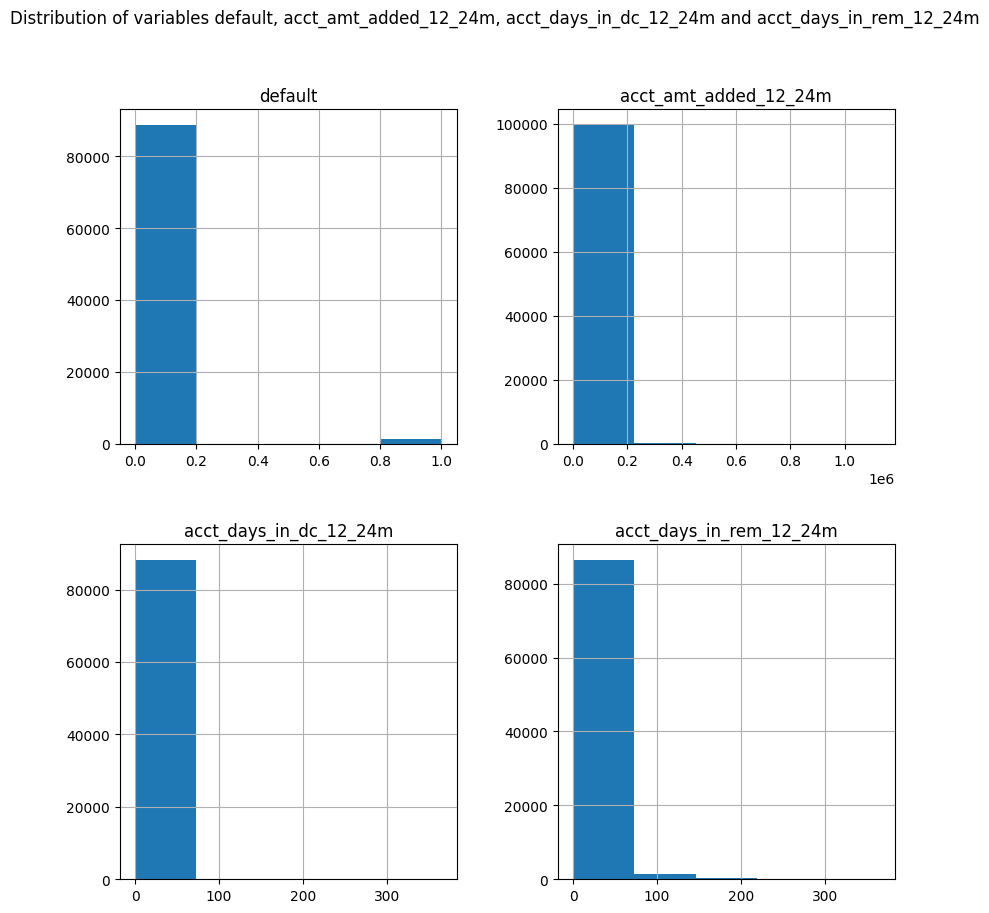

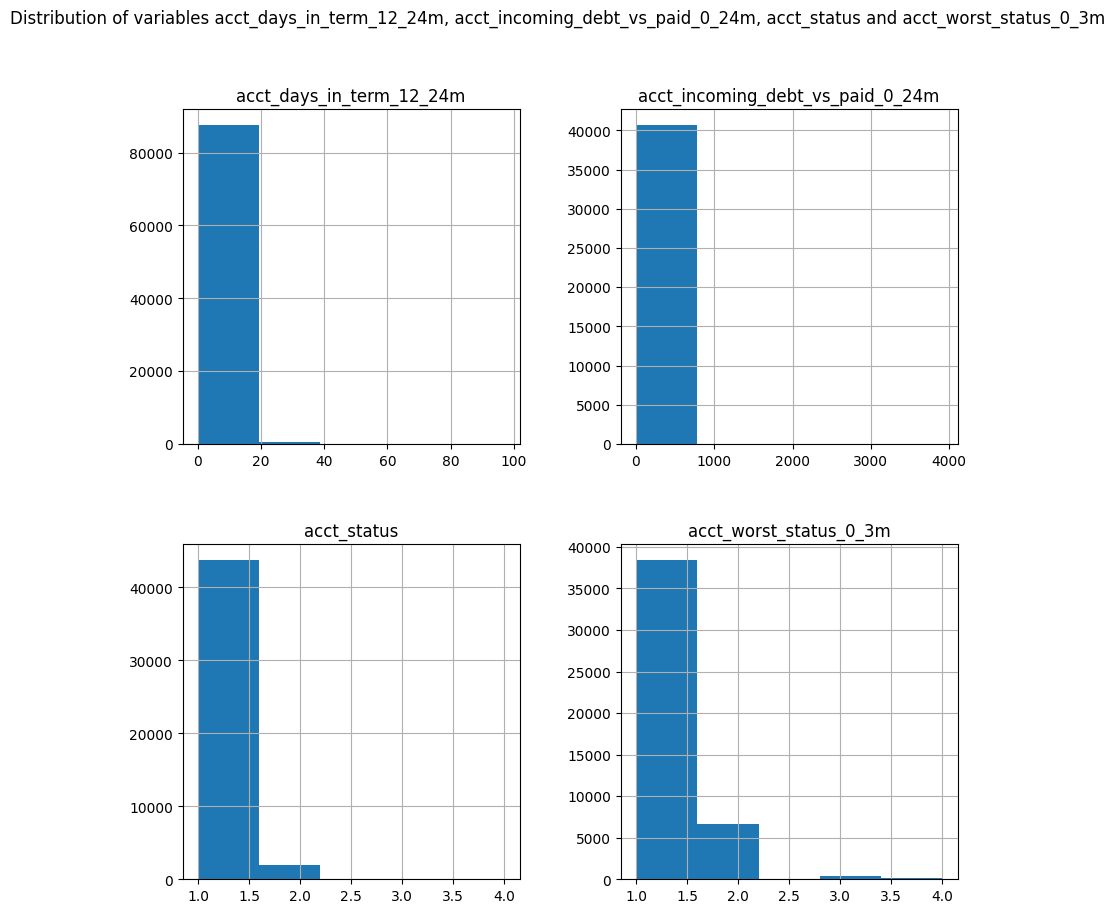

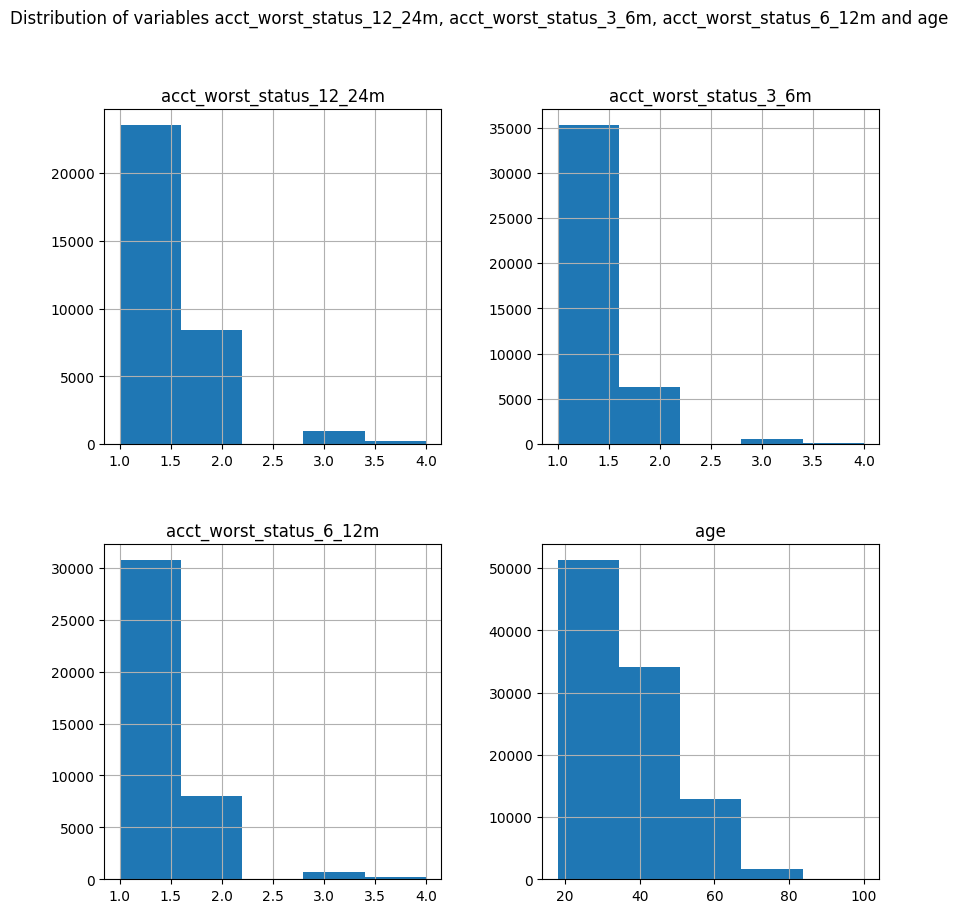

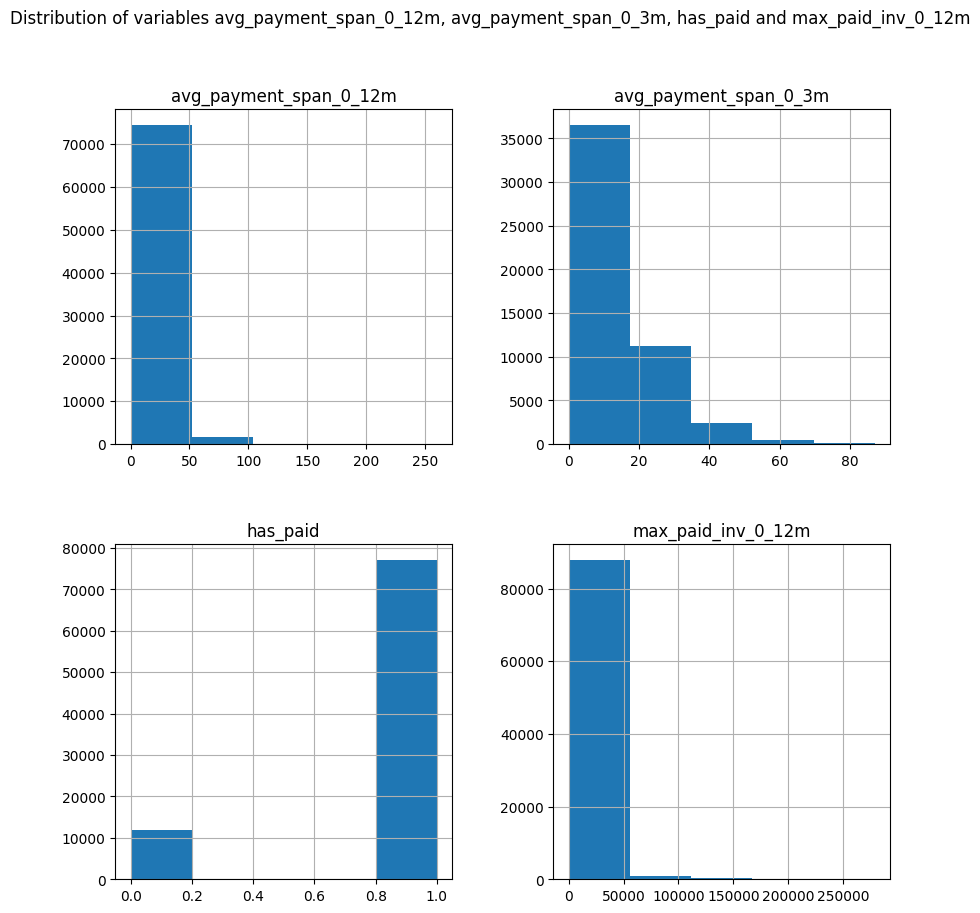

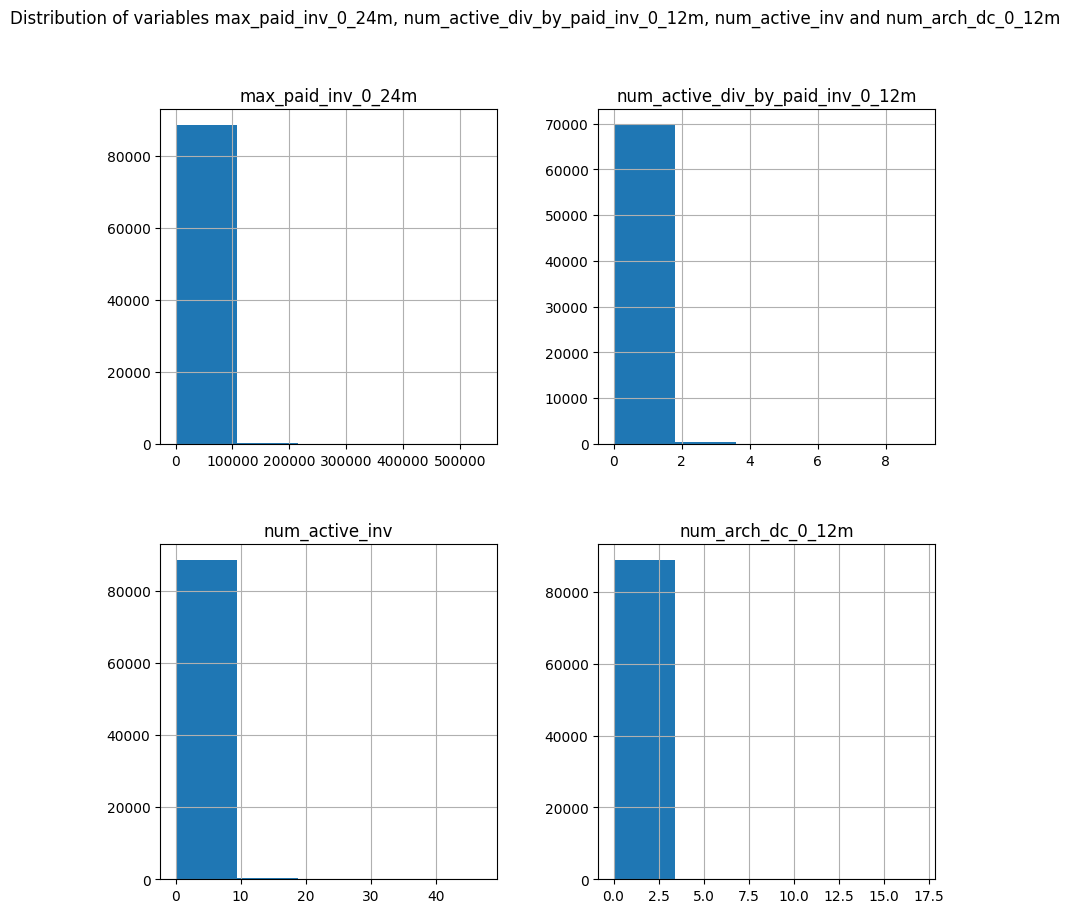

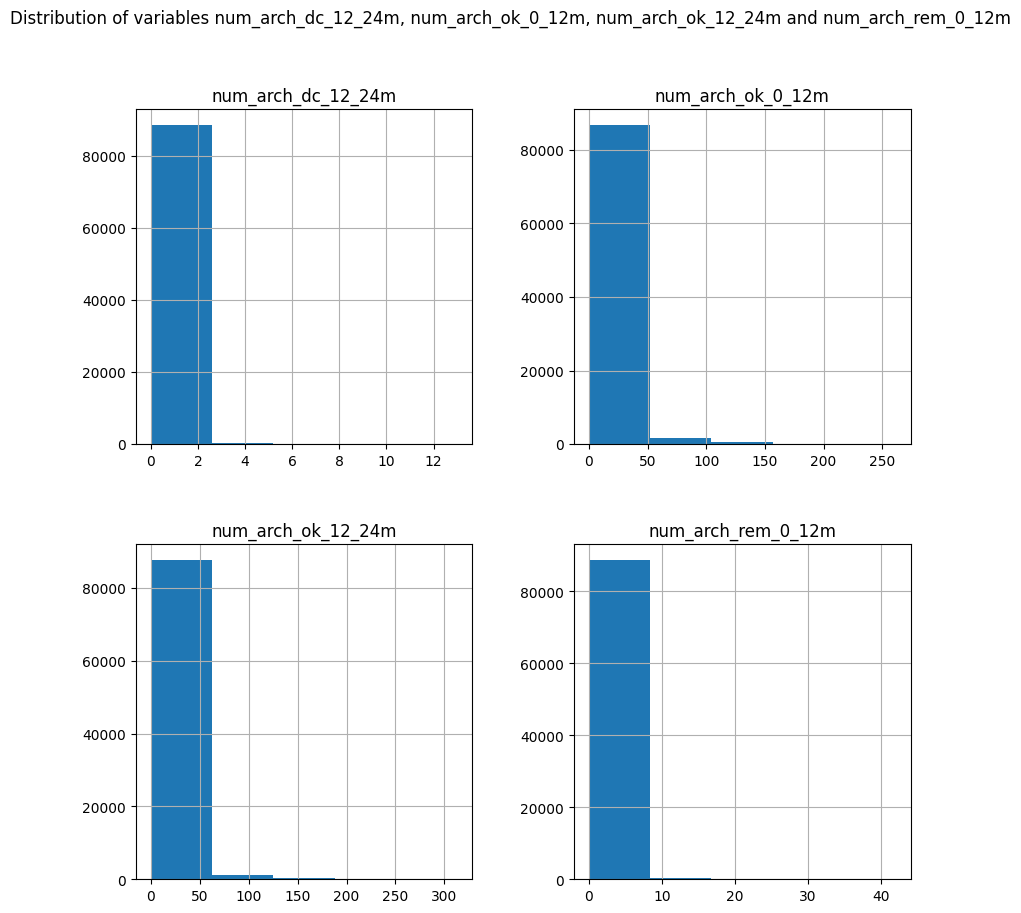

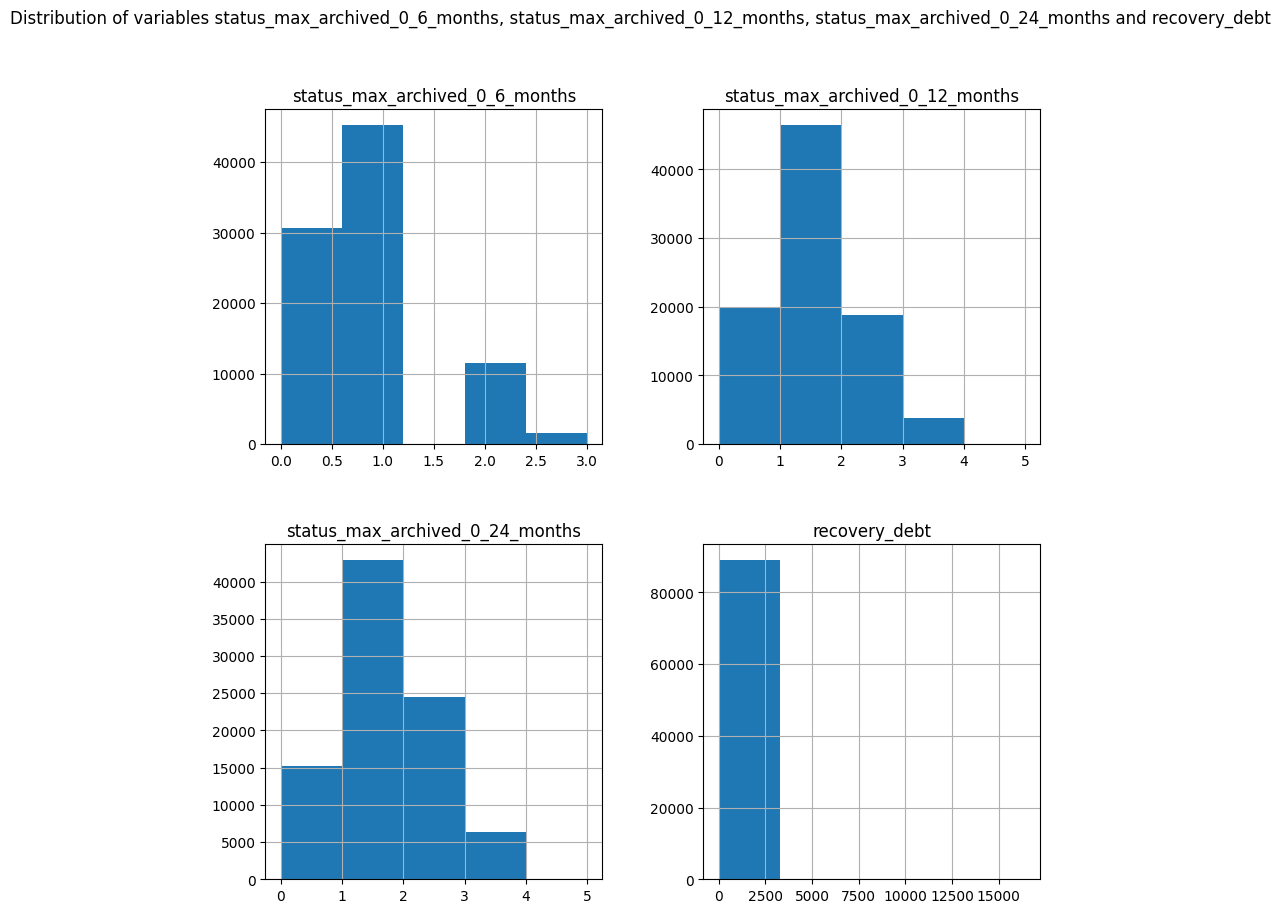

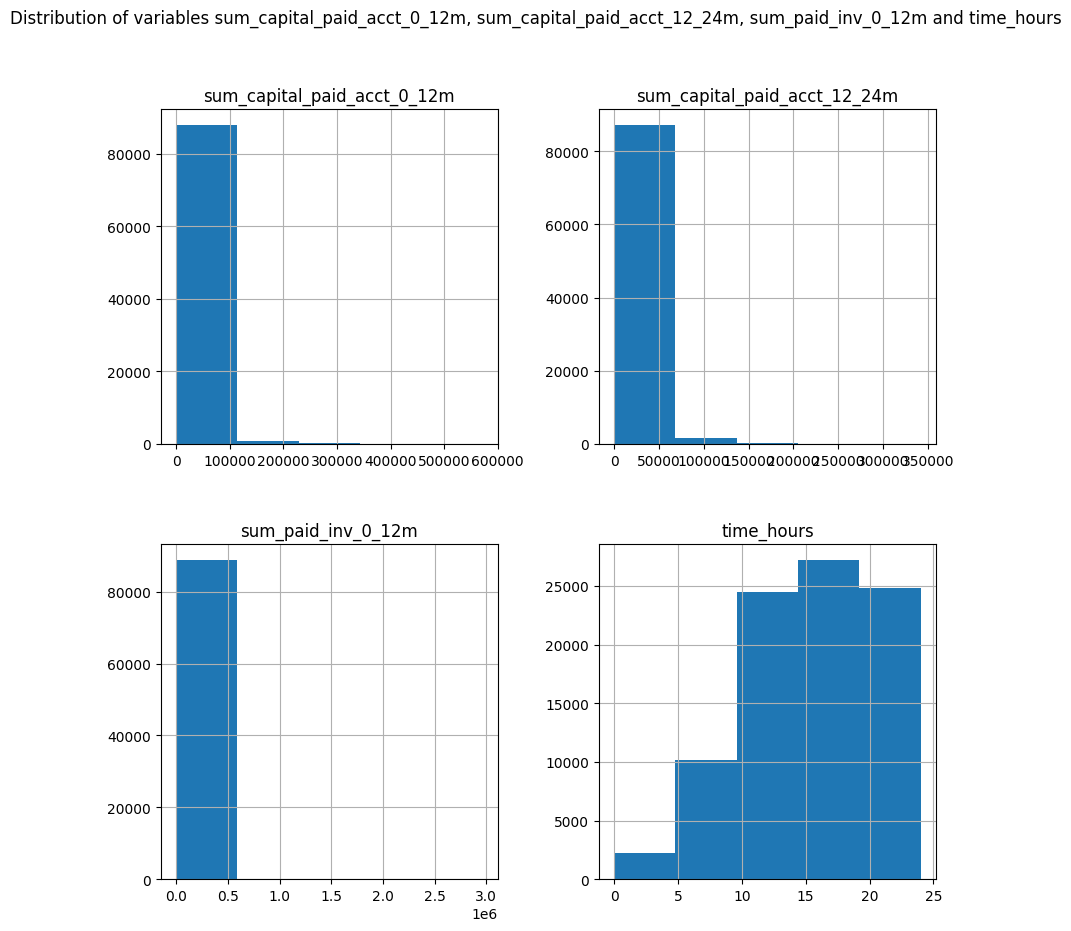

In [16]:
col = dt_orig.drop(dt_orig.select_dtypes(include='object'),axis=1).columns
for i in range(0,len(col),4):
  dt_orig[col].iloc[:,i:i+4].hist(figsize=(10,10),bins=5)
  pl.suptitle('Distribution of variables {}, {}, {} and {}'.format(col[i],col[i+1],col[i+2],col[i+3]))

Text(0.5, 1.0, 'Distribution of Merchant group')

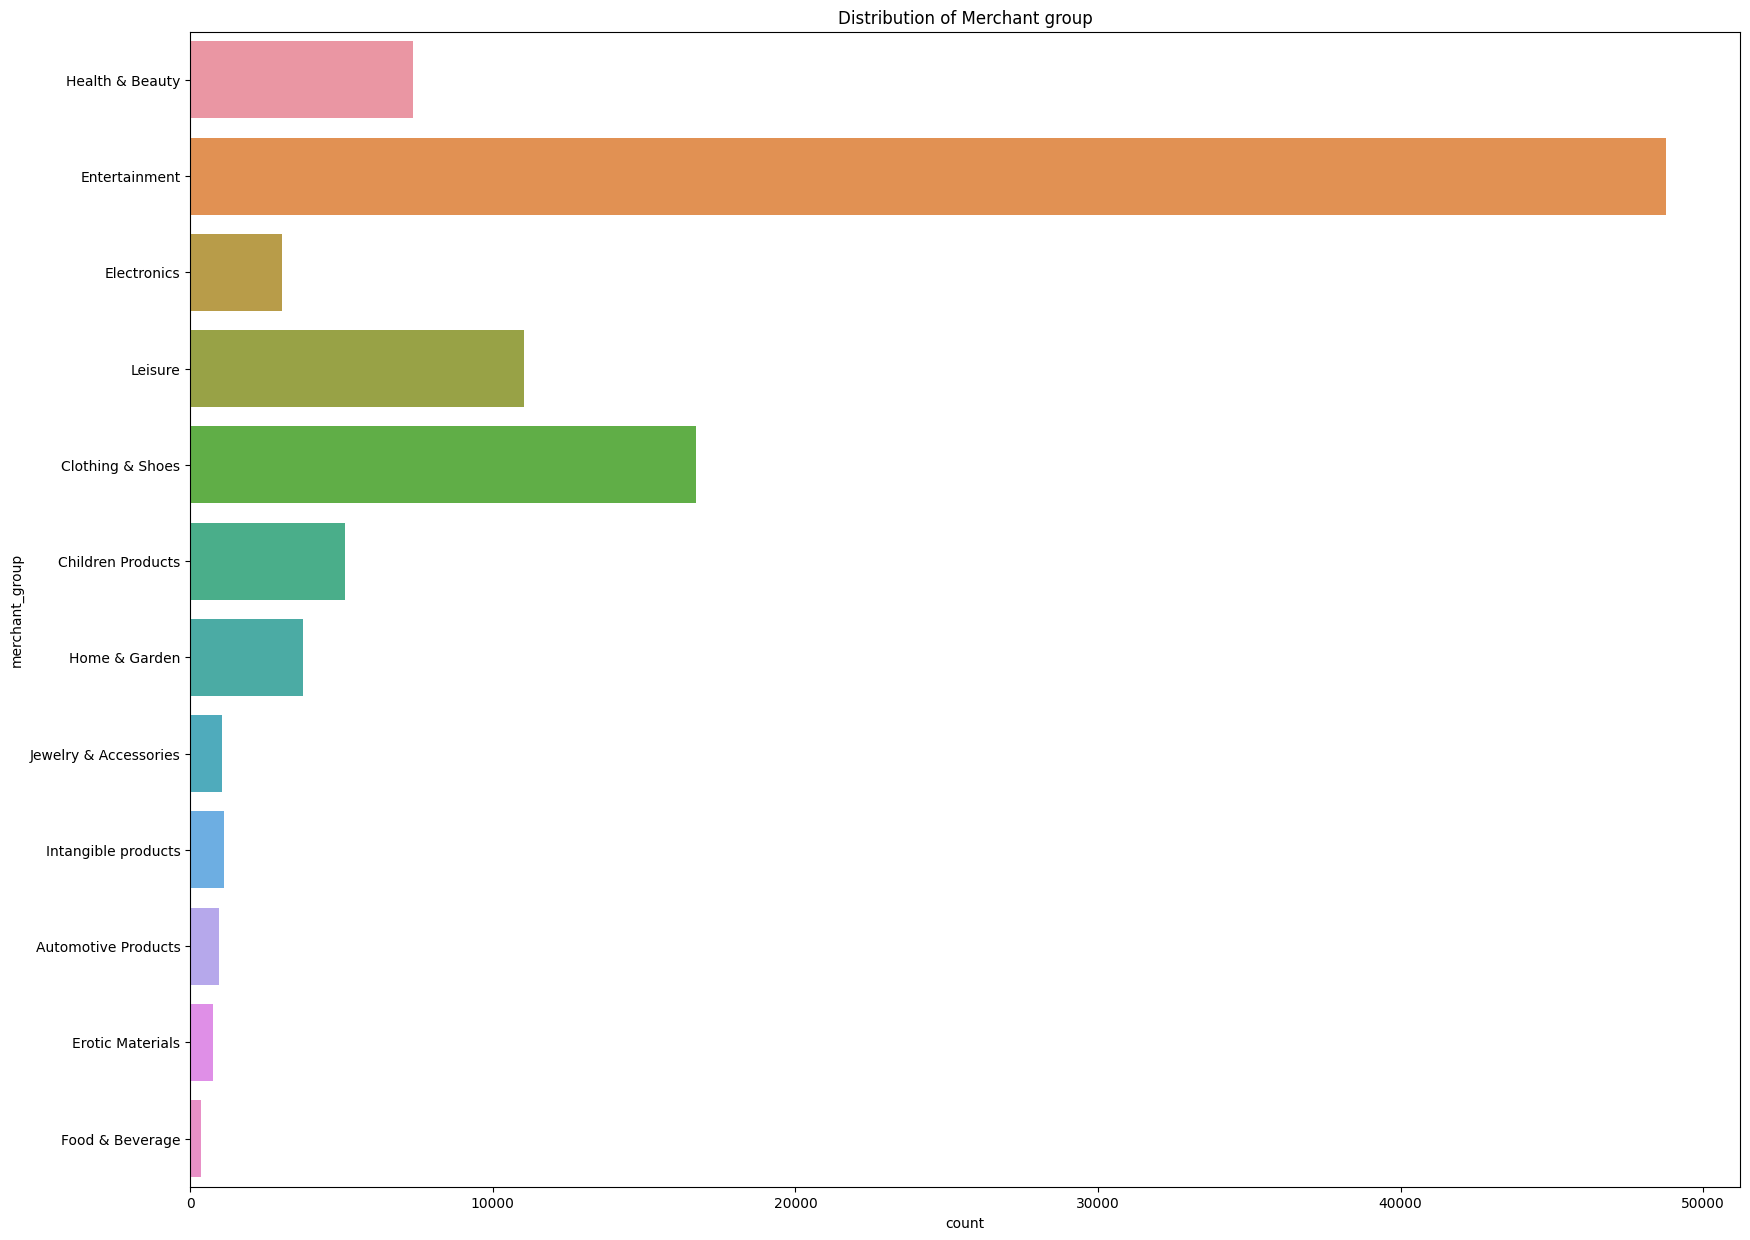

In [17]:
plt.figure(figsize=(20,15))
sns.countplot(data=dt_orig,y='merchant_group')
plt.title('Distribution of Merchant group')

Text(0.5, 1.0, 'Spread of name in email')

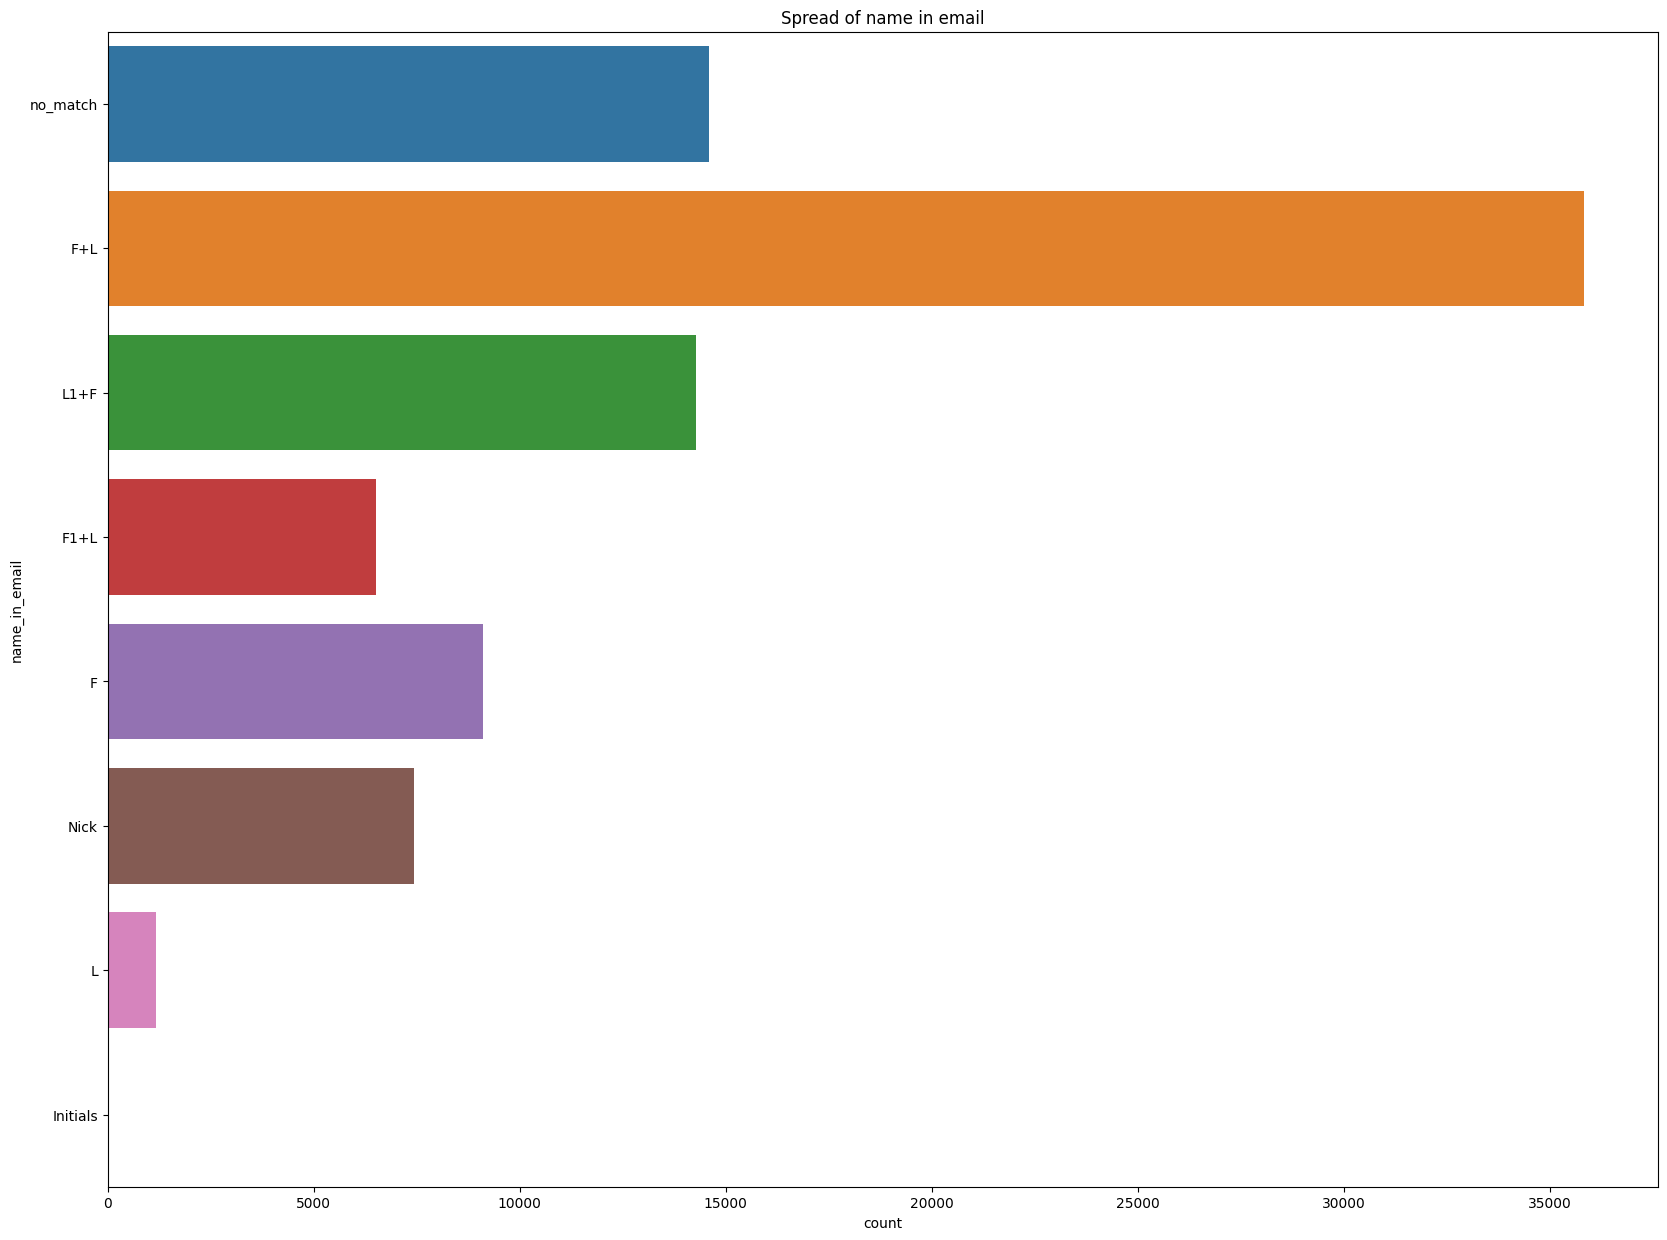

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(data=dt_orig,y='name_in_email')
plt.title('Spread of name in email')

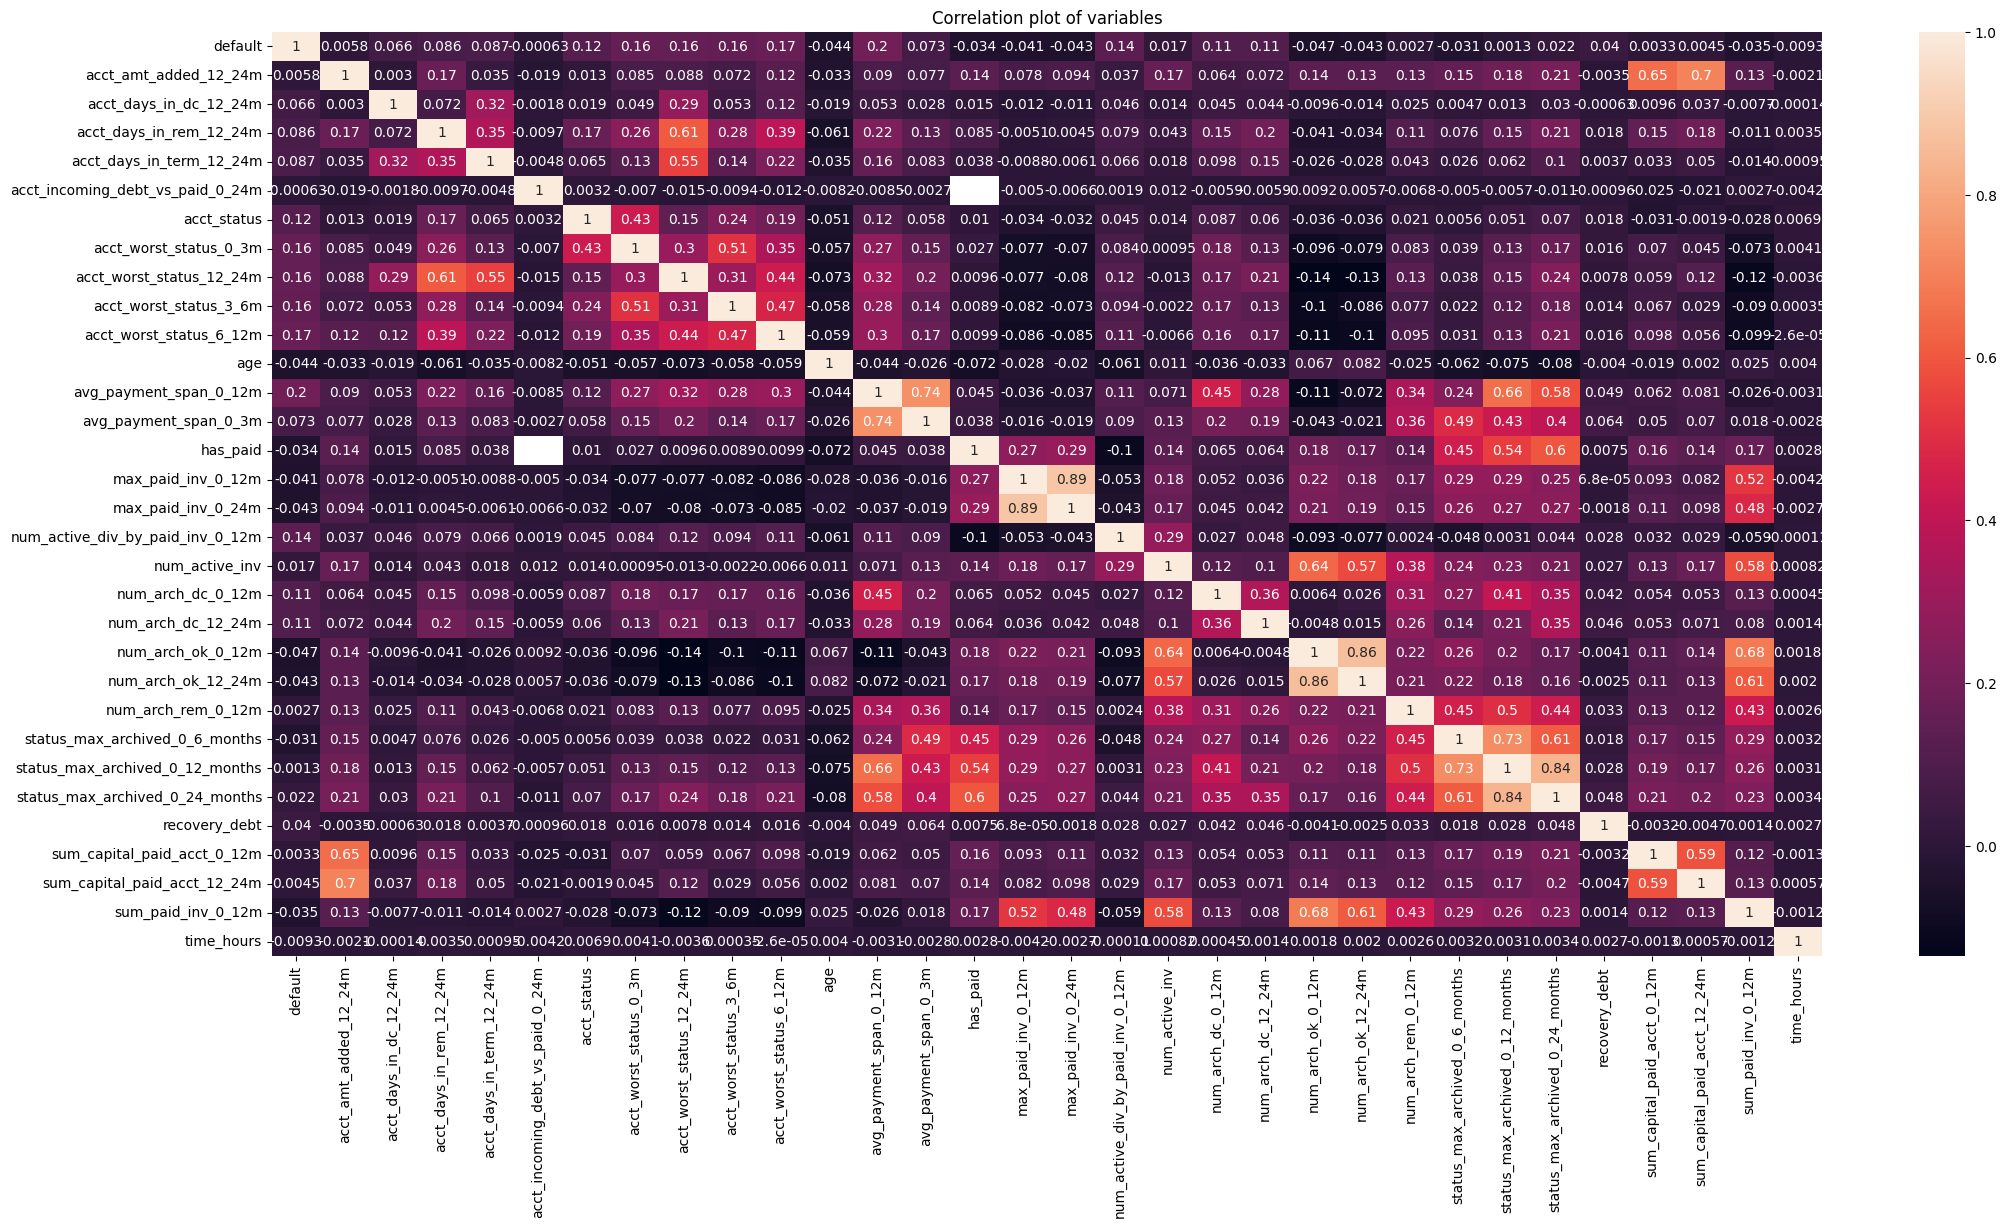

In [19]:
plt.figure(figsize=(25,12))
sns.heatmap(dt_orig[col].corr(), annot = True)
plt.title('Correlation plot of variables')
plt.show()

In [20]:
print("Top Positive Correlations")
pos_cor = get_top_positive_correlations(dt_orig[col], 25)
pos_cor.reset_index(level=[0,1])
#print('')

#print("Top Negative Correlations")
#print(get_top_negative_correlations(dt_orig[col], 5))

Top Positive Correlations


,level_0,level_1,0
0,max_paid_inv_0_12m,max_paid_inv_0_24m,0.89
1,num_arch_ok_0_12m,num_arch_ok_12_24m,0.86
2,status_max_archived_0_12_months,status_max_archived_0_24_months,0.84
3,avg_payment_span_0_12m,avg_payment_span_0_3m,0.74
4,status_max_archived_0_6_months,status_max_archived_0_12_months,0.73
5,acct_amt_added_12_24m,sum_capital_paid_acct_12_24m,0.70
6,num_arch_ok_0_12m,sum_paid_inv_0_12m,0.68
7,avg_payment_span_0_12m,status_max_archived_0_12_months,0.66
8,acct_amt_added_12_24m,sum_capital_paid_acct_0_12m,0.65
9,num_active_inv,num_arch_ok_0_12m,0.64


## Missing Value treatment

In [21]:
#THE TOTAL NUMBER OF NULL VALUES IN EACH COLUMN
null = dt_orig.isnull().sum().sort_values(ascending=False)*100/(dt_orig.index.size)
null = pd.DataFrame({'variable':null.index, 'NA_percent':null.values})
null

,variable,NA_percent
0,acct_worst_status_12_24m,66.78
1,acct_worst_status_6_12m,60.36
2,acct_incoming_debt_vs_paid_0_24m,59.33
3,acct_worst_status_3_6m,57.72
4,acct_status,54.39
5,acct_worst_status_0_3m,54.39
6,avg_payment_span_0_3m,49.32
7,num_active_div_by_paid_inv_0_12m,29.93
8,avg_payment_span_0_12m,23.84
9,acct_days_in_dc_12_24m,11.84


In [22]:
dt = dt_orig.copy()

The default column has null values. It is assumed that there is no data entry problem and hence, the NA values are replaced by 0 indicating that these accounts did not default.

In [23]:
dt['default'] = dt['default'].fillna(0)

In [24]:
dt_orig['default'].value_counts(normalize=True)*100

0.00   98.57
1.00    1.43
Name: default, dtype: float64

In [25]:
dt['default'].value_counts(normalize=True)*100

0.00   98.71
1.00    1.29
Name: default, dtype: float64

In [26]:
dt[dt['merchant_group'].isna()==True][['merchant_category','merchant_group']]

,merchant_category,merchant_group
3413,Wine,NaN
10651,Wine,NaN
12635,Wine,NaN
25453,Wine,NaN
26980,Wine,NaN
40474,Wine,NaN
43573,Wine,NaN
62485,Wine,NaN
77153,Wine,NaN


In [27]:
dt[dt['merchant_category']=='Wine'][['merchant_category','merchant_group']]

,merchant_category,merchant_group
3413,Wine,NaN
10651,Wine,NaN
12635,Wine,NaN
25453,Wine,NaN
26980,Wine,NaN
40474,Wine,NaN
43573,Wine,NaN
62485,Wine,NaN
77153,Wine,NaN


In [28]:
dt['merchant_group'].unique()

array(['Health & Beauty', 'Entertainment', 'Electronics', 'Leisure',
       'Clothing & Shoes', 'Children Products', 'Home & Garden',
       'Jewelry & Accessories', 'Intangible products',
       'Automotive Products', 'Erotic Materials', 'Food & Beverage', nan],
      dtype=object)

In [29]:
dt[dt['merchant_group']=='Food & Beverage']['merchant_category'].value_counts(normalize=True)*100

Food & Beverage   81.41
Tobacco           18.59
Name: merchant_category, dtype: float64

It is seen that all the NA values in merchant_group corresponds to 'Wine' category. Looking at the unique merchant groups, it is deemed appropriate to classify 'Wine' under 'Food and Beverages' as it also contains 'Tobacco'.

In [30]:
dt['merchant_group'] = dt['merchant_group'].fillna('Food & Beverage')
dt.drop('merchant_category',axis=1,inplace=True)

In [31]:
#THE TOTAL NUMBER OF NULL VALUES IN EACH COLUMN after correcting merchant_group
null = dt.isnull().sum().sort_values(ascending=False)*100/(dt.index.size)
null = pd.DataFrame({'variable':null.index, 'NA_percent':null.values})
null

,variable,NA_percent
0,acct_worst_status_12_24m,66.78
1,acct_worst_status_6_12m,60.36
2,acct_incoming_debt_vs_paid_0_24m,59.33
3,acct_worst_status_3_6m,57.72
4,acct_status,54.39
5,acct_worst_status_0_3m,54.39
6,avg_payment_span_0_3m,49.32
7,num_active_div_by_paid_inv_0_12m,29.93
8,avg_payment_span_0_12m,23.84
9,acct_days_in_dc_12_24m,11.84


In [32]:
threshold = 15
high_null = null[null['NA_percent']>threshold]['variable']

In [33]:
#making NAs -1 for EDA
dt[high_null] = dt[high_null].fillna(-1)

In [34]:
iv, woe_iv = iv_woe(dt,"default")

In [35]:
woe_iv[woe_iv['Variable'].isin(high_null)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,acct_incoming_debt_vs_paid_0_24m,"(-1.001, 0.0]",72387,702.00,54.50,71685.00,72.64,72.40,0.97,-0.29,5.21
1,acct_incoming_debt_vs_paid_0_24m,"(0.0, 0.167]",7594,96.00,7.45,7498.00,7.60,7.60,1.26,-0.02,0.00
2,acct_incoming_debt_vs_paid_0_24m,"(0.167, 0.674]",9997,205.00,15.92,9792.00,9.92,10.00,2.05,0.47,2.83
3,acct_incoming_debt_vs_paid_0_24m,"(0.674, 3914.0]",9998,285.00,22.13,9713.00,9.84,10.00,2.85,0.81,9.95
0,acct_status,-1.00,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65
1,acct_status,1.00,43693,668.00,51.86,43025.00,43.60,43.70,1.53,0.17,1.44
2,acct_status,2.00,1900,163.00,12.66,1737.00,1.76,1.90,8.58,1.97,21.49
3,acct_status,3.00,7,2.00,0.16,5.00,0.01,0.01,28.57,3.42,0.51
4,acct_status,4.00,3,3.00,0.23,0.00,0.00,0.00,100.00,6.13,1.42
0,acct_worst_status_0_3m,-1.00,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65


In [36]:
dt['acct_worst_status_0_3m']=np.where(dt['acct_worst_status_0_3m']==-1,0,1)
dt['acct_worst_status_3_6m']=np.where(dt['acct_worst_status_3_6m']==-1,0,1)
dt['acct_worst_status_6_12m']=np.where(dt['acct_worst_status_6_12m']==-1,0,1)
dt['acct_worst_status_12_24m']=np.where(dt['acct_worst_status_12_24m']==-1,0,1)
dt['acct_incoming_debt_vs_paid_0_24m']=np.where((dt['acct_incoming_debt_vs_paid_0_24m']==-1) | (dt['acct_incoming_debt_vs_paid_0_24m']==0),0,1)
dt['acct_status']=np.where(dt['acct_status']==-1,0,1)
dt['avg_payment_span_0_12m']=np.where(dt['avg_payment_span_0_12m']==-1,0,1)
dt['avg_payment_span_0_3m']=np.where(dt['avg_payment_span_0_3m']==-1,0,1)
dt['num_active_div_by_paid_inv_0_12m']=np.where(dt['num_active_div_by_paid_inv_0_12m']>0,1,dt['num_active_div_by_paid_inv_0_12m'])
dt['num_active_div_by_paid_inv_0_12m']=np.where(dt['num_active_div_by_paid_inv_0_12m']==-1,2,dt['num_active_div_by_paid_inv_0_12m'])

In [37]:
iv, woe_iv = iv_woe(dt,"default")

In [38]:
woe_iv[woe_iv['Variable'].isin(high_null)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,acct_incoming_debt_vs_paid_0_24m,0,72387,702.00,54.50,71685.00,72.64,72.40,0.97,-0.29,5.21
1,acct_incoming_debt_vs_paid_0_24m,1,27589,586.00,45.50,27003.00,27.36,27.60,2.12,0.51,9.22
0,acct_status,0,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65
1,acct_status,1,45603,836.00,64.91,44767.00,45.36,45.61,1.83,0.36,7.00
0,acct_worst_status_0_3m,0,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65
1,acct_worst_status_0_3m,1,45603,836.00,64.91,44767.00,45.36,45.61,1.83,0.36,7.00
0,acct_worst_status_12_24m,0,66761,748.00,58.07,66013.00,66.89,66.78,1.12,-0.14,1.25
1,acct_worst_status_12_24m,1,33215,540.00,41.93,32675.00,33.11,33.22,1.63,0.24,2.08
0,acct_worst_status_3_6m,0,57702,570.00,44.25,57132.00,57.89,57.72,0.99,-0.27,3.66
1,acct_worst_status_3_6m,1,42274,718.00,55.75,41556.00,42.11,42.28,1.70,0.28,3.83


In [39]:
#THE TOTAL NUMBER OF NULL VALUES IN EACH COLUMN after correcting high null variables
null = dt.isnull().sum().sort_values(ascending=False)*100/(dt.index.size)
null = pd.DataFrame({'variable':null.index, 'NA_percent':null.values})
null

,variable,NA_percent
0,acct_days_in_dc_12_24m,11.84
1,acct_days_in_rem_12_24m,11.84
2,acct_days_in_term_12_24m,11.84
3,max_paid_inv_0_24m,11.04
4,status_max_archived_0_6_months,11.04
5,num_arch_dc_0_12m,11.04
6,num_arch_dc_12_24m,11.04
7,num_arch_ok_0_12m,11.04
8,num_arch_ok_12_24m,11.04
9,num_arch_rem_0_12m,11.04


In [40]:
threshold_min = 0
med_null = null[(null['NA_percent']>threshold_min) & (null['NA_percent']<threshold)]['variable']

In [41]:
#making NAs -1 for EDA
dt[med_null] = dt[med_null].fillna(-1)

In [42]:
num_features = dt[med_null].select_dtypes(include='number').columns.tolist()
cat_features = dt[med_null].select_dtypes(include='object').columns.tolist()
print('Total features with null values <15% and >0%: {}'.format(len(med_null)))
print('Total numerical features with null values <15% and >0%: {}'.format(len(num_features)))
print('Total categorical features with null values <15% and >0%: {}'.format(cat_features))

Total features with null values <15% and >0%: 21
Total numerical features with null values <15% and >0%: 20
Total categorical features with null values <15% and >0%: ['name_in_email']


In [43]:
iv, woe_iv = iv_woe(dt,"default")

In [44]:
woe_iv[woe_iv['Variable'].isin(cat_features)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,name_in_email,-1,11034,179.00,13.90,10855.00,11.00,11.04,1.62,0.23,0.68
1,name_in_email,F,9119,98.00,7.61,9021.00,9.14,9.12,1.07,-0.18,0.28
2,name_in_email,F+L,35822,387.00,30.05,35435.00,35.91,35.83,1.08,-0.18,1.04
3,name_in_email,F1+L,6516,79.00,6.13,6437.00,6.52,6.52,1.21,-0.06,0.02
4,name_in_email,Initials,20,0.00,0.04,20.00,0.02,0.02,0.00,0.65,0.01
5,name_in_email,L,1169,24.00,1.86,1145.00,1.16,1.17,2.05,0.47,0.33
6,name_in_email,L1+F,14282,147.00,11.41,14135.00,14.32,14.29,1.03,-0.23,0.66
7,name_in_email,Nick,7426,124.00,9.63,7302.00,7.40,7.43,1.67,0.26,0.59
8,name_in_email,no_match,14588,250.00,19.41,14338.00,14.53,14.59,1.71,0.29,1.41


In [45]:
dt['name_in_email']=np.where(dt['name_in_email']==-1,'no_match',dt['name_in_email'])

In [46]:
discrete = []
cont = []
for i in dt[num_features].columns:
  if (dt[num_features][i].nunique()<8):
    discrete.append(i)
  else:
    cont.append(i)

In [47]:
print('Total numerical features with null values <15% and >0%: {}'.format(len(num_features)))
print('Total distinct value features with null values <15% and >0%: {}'.format(len(discrete)))
print('Total  continuous value features with null values <15% and >0%: {}'.format(len(cont)))

Total numerical features with null values <15% and >0%: 20
Total distinct value features with null values <15% and >0%: 4
Total  continuous value features with null values <15% and >0%: 16


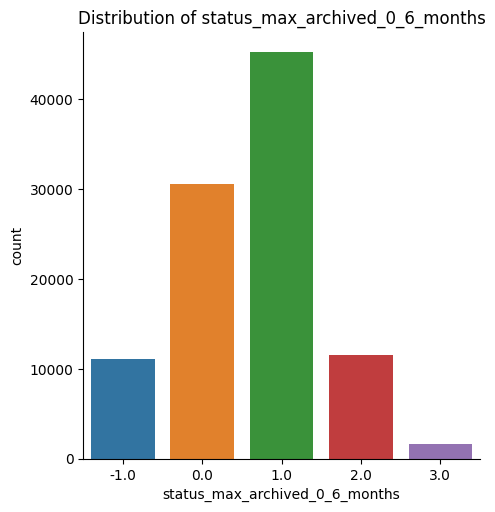

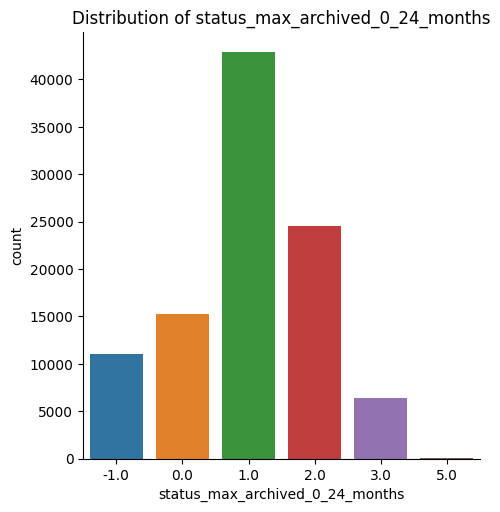

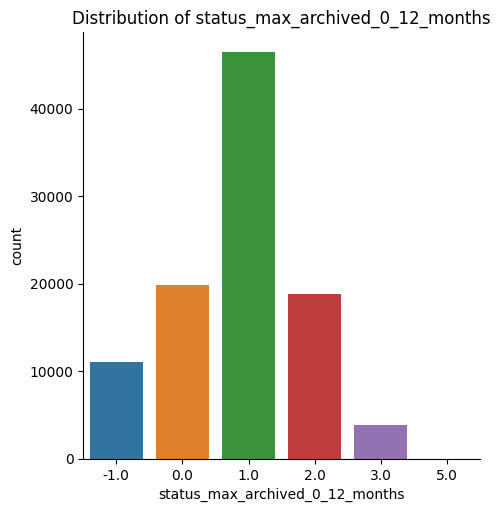

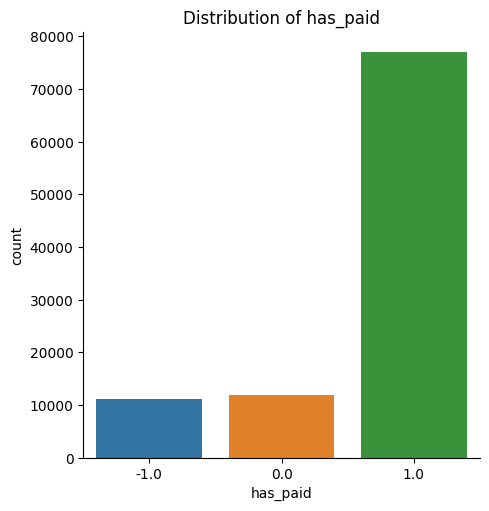

In [48]:
for i in range(len(discrete)):
  sns.catplot(data=dt[discrete], x=discrete[i], kind="count")
  plt.title('Distribution of {}'.format(discrete[i]))
  plt.show()

In [49]:
woe_iv[woe_iv['Variable'].isin(discrete)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,has_paid,-1.00,11034,179.00,13.90,10855.00,11.00,11.04,1.62,0.23,0.68
1,has_paid,0.00,11940,258.00,20.03,11682.00,11.84,11.94,2.16,0.53,4.31
2,has_paid,1.00,77002,851.00,66.07,76151.00,77.16,77.02,1.11,-0.16,1.72
0,status_max_archived_0_6_months,-1.00,11034,179.00,13.90,10855.00,11.00,11.04,1.62,0.23,0.68
1,status_max_archived_0_6_months,0.00,30587,725.00,56.29,29862.00,30.26,30.59,2.37,0.62,16.16
2,status_max_archived_0_6_months,1.00,45214,164.00,12.73,45050.00,45.65,45.22,0.36,-1.28,42.03
3,status_max_archived_0_6_months,2.00,11549,119.00,9.24,11430.00,11.58,11.55,1.03,-0.23,0.53
4,status_max_archived_0_6_months,3.00,1592,101.00,7.84,1491.00,1.51,1.59,6.34,1.65,10.43
0,status_max_archived_0_12_months,-1.00,11034,179.00,13.90,10855.00,11.00,11.04,1.62,0.23,0.68
1,status_max_archived_0_12_months,0.00,19880,531.00,41.23,19349.00,19.61,19.88,2.67,0.74,16.07


In [50]:
dt['status_max_archived_0_24_months']=np.where(dt['status_max_archived_0_24_months']>1,2,dt['status_max_archived_0_24_months'])
dt['status_max_archived_0_12_months']=np.where(dt['status_max_archived_0_12_months']>1,2,dt['status_max_archived_0_12_months'])
dt['status_max_archived_0_6_months']=np.where(dt['status_max_archived_0_6_months']>1,2,dt['status_max_archived_0_6_months'])

In [51]:
gt_z = (dt[cont]>0).sum().sort_values(ascending = True)/dt[cont].shape[0]*100
gt_z = pd.DataFrame({'variable':gt_z.index, 'greater_than_zero_percent':gt_z.values})
gt_z

,variable,greater_than_zero_percent
0,recovery_debt,0.20
1,acct_days_in_dc_12_24m,0.26
2,acct_days_in_term_12_24m,1.21
3,num_arch_dc_12_24m,3.55
4,num_arch_dc_0_12m,3.80
5,acct_days_in_rem_12_24m,9.62
6,num_arch_rem_0_12m,21.14
7,sum_capital_paid_acct_12_24m,22.49
8,num_active_inv,27.82
9,sum_capital_paid_acct_0_12m,30.23


As seen from the above output, some continuous variables have most values as 0. (As high as 99.8% in recovery debt) These variables will not add value to the PD model. Hence, variables with greater than zero percent less 5% are dropped.

In [52]:
drop_zero = gt_z[gt_z['greater_than_zero_percent']<5]['variable']

In [53]:
dt.drop(drop_zero,axis=1,inplace=True)

In [54]:
for i in range(len(drop_zero)):
  cont.remove(drop_zero[i])

In [55]:
#After removal of low non-zero variables
gt_z = (dt[cont]>0).sum().sort_values(ascending = True)/dt[cont].shape[0]*100
gt_z = pd.DataFrame({'variable':gt_z.index, 'greater_than_zero_percent':gt_z.values})
gt_z

,variable,greater_than_zero_percent
0,acct_days_in_rem_12_24m,9.62
1,num_arch_rem_0_12m,21.14
2,sum_capital_paid_acct_12_24m,22.49
3,num_active_inv,27.82
4,sum_capital_paid_acct_0_12m,30.23
5,num_arch_ok_12_24m,57.05
6,num_arch_ok_0_12m,66.17
7,sum_paid_inv_0_12m,71.11
8,max_paid_inv_0_12m,71.11
9,max_paid_inv_0_24m,74.69


In [56]:
eq_z = (dt[cont]==0).sum().sort_values(ascending = True)/dt[cont].shape[0]*100
eq_z = pd.DataFrame({'variable':eq_z.index, 'zero_percent':eq_z.values})
eq_z

,variable,zero_percent
0,time_hours,0.00
1,max_paid_inv_0_24m,14.27
2,sum_paid_inv_0_12m,17.85
3,max_paid_inv_0_12m,17.85
4,num_arch_ok_0_12m,22.80
5,num_arch_ok_12_24m,31.92
6,sum_capital_paid_acct_0_12m,58.73
7,num_active_inv,61.14
8,sum_capital_paid_acct_12_24m,66.48
9,num_arch_rem_0_12m,67.82


Imputing the variables with high percentage of zero values will cause all non-zero values to be outliers as per the IQR method (UL = Q3 + 1.5*IQR, UL = Q1 – 1.5*IQR) because both the Q1 and Q3 values will become 0 and anything over Q3 (0) will become outliers. Hence, these variables will be converted into binary variables – zero and not zero (not zero and null). The cut-off for choosing these variables is 25%.

In [57]:
cut_off=25
impute_binary = eq_z[eq_z['zero_percent']>cut_off]['variable']

In [58]:
for i in impute_binary:
  dt[i]=np.where(dt[i]==0,0,1)

In [59]:
eq_z = (dt[impute_binary]==1).sum().sort_values(ascending = True)/dt[cont].shape[0]*100
eq_z = pd.DataFrame({'variable':eq_z.index, 'non_zero_percent':eq_z.values})
eq_z

,variable,non_zero_percent
0,acct_days_in_rem_12_24m,21.46
1,num_arch_rem_0_12m,32.18
2,sum_capital_paid_acct_12_24m,33.52
3,num_active_inv,38.86
4,sum_capital_paid_acct_0_12m,41.27
5,num_arch_ok_12_24m,68.08


In [60]:
for i in impute_binary:
  cont.remove(i)

In [61]:
cont

['max_paid_inv_0_24m',
 'num_arch_ok_0_12m',
 'sum_paid_inv_0_12m',
 'time_hours',
 'max_paid_inv_0_12m']

In [62]:
woe_iv[woe_iv['Variable'].isin(cont)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,max_paid_inv_0_12m,"(-1.001, 0.0]",28880,587.00,45.57,28293.00,28.67,28.89,2.03,0.46,7.84
1,max_paid_inv_0_12m,"(0.0, 1201.0]",1113,68.00,5.28,1045.00,1.06,1.11,6.11,1.61,6.78
2,max_paid_inv_0_12m,"(1201.0, 3685.0]",10012,148.00,11.49,9864.00,10.00,10.01,1.48,0.14,0.21
3,max_paid_inv_0_12m,"(3685.0, 5290.0]",10382,96.00,7.45,10286.00,10.42,10.38,0.92,-0.34,1.00
4,max_paid_inv_0_12m,"(5290.0, 6889.0]",9599,99.00,7.69,9500.00,9.63,9.60,1.03,-0.23,0.44
5,max_paid_inv_0_12m,"(6889.0, 9180.0]",10003,98.00,7.61,9905.00,10.04,10.01,0.98,-0.28,0.67
6,max_paid_inv_0_12m,"(9180.0, 12310.0]",9999,96.00,7.45,9903.00,10.03,10.00,0.96,-0.30,0.77
7,max_paid_inv_0_12m,"(12310.0, 18802.0]",9991,67.00,5.20,9924.00,10.06,9.99,0.67,-0.66,3.20
8,max_paid_inv_0_12m,"(18802.0, 279000.0]",9997,29.00,2.25,9968.00,10.10,10.00,0.29,-1.50,11.78
0,max_paid_inv_0_24m,"(-1.001, 0.0]",25302,528.00,40.99,24774.00,25.10,25.31,2.09,0.49,7.79


In [63]:
dt['time_hours']=np.where(dt['time_hours']==-1,0,dt['time_hours'])

In [64]:
for i in cont:
  a = dt[i].mean()
  dt[i]=np.where(dt[i]==-1,a,dt[i])

In [65]:
(dt[cont]==-1).sum().sort_values(ascending = True)/dt[cont].shape[0]*100

max_paid_inv_0_24m   0.00
num_arch_ok_0_12m    0.00
sum_paid_inv_0_12m   0.00
time_hours           0.00
max_paid_inv_0_12m   0.00
dtype: float64

All Null values have been treated

## Outlier check

In [66]:
num_features = dt.select_dtypes(include='number').columns.tolist()
cat_features = dt.select_dtypes(include='object').columns.tolist()
print('Total features: {}'.format(len(dt.columns)))
print('Total numerical features: {}'.format(len(num_features)))
print('Total categorical features: {}'.format(cat_features))

Total features: 29
Total numerical features: 27
Total categorical features: ['merchant_group', 'name_in_email']


In [67]:
discrete = []
cont = []
for i in dt[num_features].columns:
  if (dt[num_features][i].nunique()<8):
    discrete.append(i)
  else:
    cont.append(i)

In [68]:
q3=dt[num_features].quantile(0.75)
q1=dt[num_features].quantile(0.25)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [69]:
((dt[num_features]>ul) | (dt[num_features]<ll)).sum().sort_values(ascending = False)/dt[num_features].shape[0]*100

avg_payment_span_0_12m             23.84
has_paid                           22.98
acct_days_in_rem_12_24m            21.46
acct_amt_added_12_24m              19.83
num_arch_ok_0_12m                  10.18
sum_paid_inv_0_12m                  9.70
max_paid_inv_0_24m                  7.93
max_paid_inv_0_12m                  7.52
default                             1.29
age                                 0.43
acct_worst_status_6_12m             0.00
acct_incoming_debt_vs_paid_0_24m    0.00
sum_capital_paid_acct_12_24m        0.00
sum_capital_paid_acct_0_12m         0.00
status_max_archived_0_24_months     0.00
status_max_archived_0_12_months     0.00
status_max_archived_0_6_months      0.00
num_arch_rem_0_12m                  0.00
num_arch_ok_12_24m                  0.00
acct_status                         0.00
num_active_inv                      0.00
num_active_div_by_paid_inv_0_12m    0.00
acct_worst_status_0_3m              0.00
acct_worst_status_12_24m            0.00
acct_worst_statu

In [70]:
dt[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
acct_amt_added_12_24m,99976.00,12255.15,35481.48,0.00,0.00,0.00,4937.25,1128775.00
age,99976.00,36.02,13.00,18.00,25.00,34.00,45.00,100.00
max_paid_inv_0_12m,99976.00,9248.76,12899.97,0.00,2990.00,7082.00,10570.00,279000.00
max_paid_inv_0_24m,99976.00,11280.62,14560.63,0.00,4249.75,8950.00,12785.00,538500.00
num_arch_ok_0_12m,99976.00,7.68,15.79,0.00,1.00,3.00,7.00,261.00
sum_paid_inv_0_12m,99976.00,40536.50,89235.34,0.00,4870.00,21974.00,40393.50,2962870.00
time_hours,99976.00,13.65,6.75,0.00,9.93,14.79,19.17,24.00


In [71]:
dt[(dt[cont]>ul) | (dt[cont]<ll)]=np.nan

<ipython-input-71-dd84f5a70655>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dt[(dt[cont]>ul) | (dt[cont]<ll)]=np.nan
<ipython-input-71-dd84f5a70655>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dt[(dt[cont]>ul) | (dt[cont]<ll)]=np.nan


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(dt[num_features]), columns = dt[num_features].columns)

In [73]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#n_neighbors is taken as the default value in the first step

In [74]:
imputed = pd.DataFrame(imputer.fit_transform(dt[num_features]), columns = dt[num_features].columns)

In [75]:
dt[cont].isnull().sum()
#imputed.isnull().sum()

acct_amt_added_12_24m    19825
age                        433
max_paid_inv_0_12m        7515
max_paid_inv_0_24m        7924
num_arch_ok_0_12m        10178
sum_paid_inv_0_12m        9693
time_hours                   0
dtype: int64

In [76]:
dt_imputed = pd.concat([imputed,dt[cat_features]],axis=1)
dt_imputed.head()

,default,acct_amt_added_12_24m,acct_days_in_rem_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,acct_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours,merchant_group,name_in_email
0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,20.00,1.00,1.00,1.00,11770.20,12831.20,1.00,1.00,13.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,53143.80,9.65,Health & Beauty,no_match
1,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,50.00,1.00,1.00,1.00,13749.00,13749.00,0.00,0.00,9.00,1.00,1.00,1.00,2.00,2.00,0.00,0.00,49014.00,13.18,Entertainment,F+L
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00,1.00,1.00,1.00,9165.00,9165.00,1.00,1.00,11.00,0.00,1.00,1.00,2.00,2.00,0.00,0.00,52437.60,11.56,Entertainment,L1+F
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,36.00,1.00,1.00,1.00,11628.80,13347.80,1.00,1.00,4.40,1.00,0.00,1.00,1.00,1.00,0.00,0.00,43088.80,15.75,Entertainment,F1+L
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,1.00,1.00,1.00,7100.00,7100.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,7100.00,12.70,Electronics,F+L


In [77]:
dt_imputed[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
acct_amt_added_12_24m,99976.00,1043.34,2326.43,0.00,0.00,0.00,90.00,12342.00
age,99976.00,35.87,12.71,18.00,25.00,34.00,45.00,75.00
max_paid_inv_0_12m,99976.00,6978.77,5183.35,0.00,2990.00,6990.00,9890.00,21940.00
max_paid_inv_0_24m,99976.00,8760.34,6226.91,0.00,4235.00,8780.00,11900.00,25575.00
num_arch_ok_0_12m,99976.00,4.25,3.91,0.00,1.00,3.00,6.82,16.00
sum_paid_inv_0_12m,99976.00,26660.36,24073.44,0.00,4870.00,21842.50,38667.00,93678.00
time_hours,99976.00,13.65,6.75,0.00,9.93,14.79,19.17,24.00


In [78]:
dt_imputed.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_rem_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'has_paid',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'sum_capital_paid_acct_0_12m',
       'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours',
       'merchant_group', 'name_in_email'],
      dtype='object')

In [79]:
iv, woe_iv = iv_woe(dt_imputed,"default")

In [80]:
iv.sort_values(by='IV',ascending=False).head(6)

,Variable,IV
0,num_arch_ok_0_12m,88.07
0,status_max_archived_0_6_months,59.92
0,status_max_archived_0_12_months,53.99
0,status_max_archived_0_24_months,49.33
0,avg_payment_span_0_3m,44.07
0,num_arch_ok_12_24m,37.84


#IV values

In [81]:
iv_subset1 = iv[(iv['IV'] >= 2) & (iv['IV'] <= 50)]
iv_subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  24 non-null     object 
 1   IV        24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [82]:
a = np.array(iv_subset1['Variable'])
a

array(['acct_amt_added_12_24m', 'acct_days_in_rem_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'has_paid',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_ok_12_24m', 'status_max_archived_0_24_months',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'merchant_group',
       'name_in_email'], dtype=object)

In [83]:
dt_imputed1=dt_imputed[a]

#Variable encoding

In [84]:
#encoded_data=pd.get_dummies(dt_imputed1, columns =['merchant_group','num_active_div_by_paid_inv_0_12m', 'name_in_email', 'has_paid'])

In [85]:
dt_imputed1.dtypes

acct_amt_added_12_24m               float64
acct_days_in_rem_12_24m             float64
acct_incoming_debt_vs_paid_0_24m    float64
acct_status                         float64
acct_worst_status_0_3m              float64
acct_worst_status_12_24m            float64
acct_worst_status_3_6m              float64
acct_worst_status_6_12m             float64
age                                 float64
avg_payment_span_0_12m              float64
avg_payment_span_0_3m               float64
has_paid                            float64
max_paid_inv_0_12m                  float64
max_paid_inv_0_24m                  float64
num_active_div_by_paid_inv_0_12m    float64
num_active_inv                      float64
num_arch_ok_12_24m                  float64
status_max_archived_0_24_months     float64
sum_capital_paid_acct_0_12m         float64
sum_capital_paid_acct_12_24m        float64
sum_paid_inv_0_12m                  float64
time_hours                          float64
merchant_group                  

In [86]:
mappings = []
label_encoder = LabelEncoder()
for i, col in enumerate(dt_imputed1):
    if dt_imputed1[col].dtype == 'object':
        dt_imputed1[col] = label_encoder.fit_transform(np.array(dt_imputed1[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

<ipython-input-86-9ff7c2ba42a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_imputed1[col] = label_encoder.fit_transform(np.array(dt_imputed1[col].astype(str)).reshape((-1,)))
<ipython-input-86-9ff7c2ba42a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_imputed1[col] = label_encoder.fit_transform(np.array(dt_imputed1[col].astype(str)).reshape((-1,)))


In [87]:
dt_imputed1['merchant_group'].value_counts()

4     48779
2     16728
11    11025
7      7356
1      5108
8      3718
3      3034
9      1122
10     1058
0       937
5       747
6       364
Name: merchant_group, dtype: int64

In [88]:
dt_imputed['merchant_group'].value_counts()

Entertainment            48779
Clothing & Shoes         16728
Leisure                  11025
Health & Beauty           7356
Children Products         5108
Home & Garden             3718
Electronics               3034
Intangible products       1122
Jewelry & Accessories     1058
Automotive Products        937
Erotic Materials           747
Food & Beverage            364
Name: merchant_group, dtype: int64

In [89]:
dt_imputed1['name_in_email'].value_counts()

1    35822
7    25622
5    14282
0     9119
6     7426
2     6516
4     1169
3       20
Name: name_in_email, dtype: int64

In [90]:
dt_imputed['name_in_email'].value_counts()

F+L         35822
no_match    25622
L1+F        14282
F            9119
Nick         7426
F1+L         6516
L            1169
Initials       20
Name: name_in_email, dtype: int64

#Train Test Split

In [91]:
y=dt_imputed['default']

X_train, X_test, y_train, y_test= train_test_split(dt_imputed1, y, test_size=0.30, random_state=1)

#SMOTE

In [92]:
os = SMOTE(random_state=42)
#columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['default'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no defaults in oversampled data",len(os_data_y[os_data_y['default']==0]))
print("Number of defaults",len(os_data_y[os_data_y['default']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['default']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default']==1])/len(os_data_X))

length of oversampled data is  138170
Number of no defaults in oversampled data 69085
Number of defaults 69085
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


#Logistic Regression - Base

In [94]:
log1 = LogisticRegression()
log1.fit(os_data_X, os_data_y)
y_predict_train = log1.predict(os_data_X)
y_predict = log1.predict(X_test)
train_accuracy = log1.score(os_data_X, os_data_y)
print('LR model train accuracy', train_accuracy)
test_accuracy = log1.score(X_test, y_test)
print('LR model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR model train accuracy 0.6612216834334516
LR model test accuracy 0.6192778314940153
Train confusion matrix:
[[43131 25954]
 [20855 48230]]
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.65     69085
         1.0       0.65      0.70      0.67     69085

    accuracy                           0.66    138170
   macro avg       0.66      0.66      0.66    138170
weighted avg       0.66      0.66      0.66    138170

Test confusion matrix:
[[18295 11308]
 [  111   279]]
              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76     29603
         1.0       0.02      0.72      0.05       390

    accuracy                           0.62     29993
   macro avg       0.51      0.67      0.40     29993
weighted avg       0.98      0.62      0.75     29993



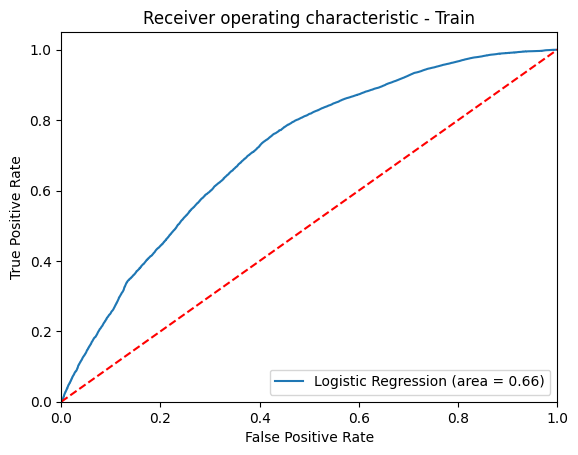

In [95]:
train_roc_auc = roc_auc_score(os_data_y, log1.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, log1.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

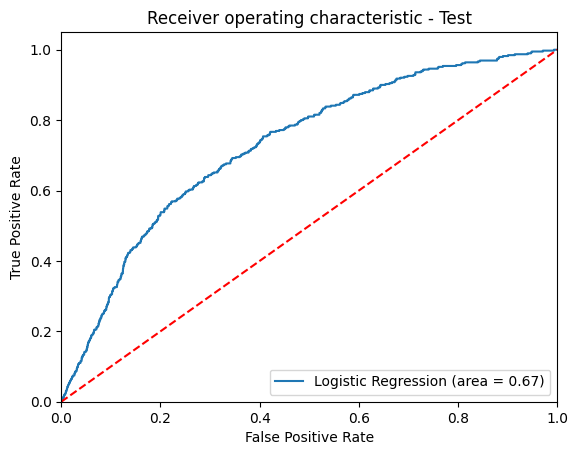

In [96]:
test_roc_auc = roc_auc_score(y_test, log1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [98]:
data = {'Model': ['Logistic Regression - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance = pd.DataFrame(data)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67


#Logistic Regression - Base wo SMOTE

In [96]:
log2 = LogisticRegression(class_weight='balanced')
log2.fit(X_train,y_train)
y_predict_train = log2.predict(X_train)
y_predict = log2.predict(X_test)
train_accuracy = log2.score(X_train,y_train)
print('LR model train accuracy', train_accuracy)
test_accuracy = log2.score(X_test, y_test)
print('LR model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR model train accuracy 0.6425274709572325
LR model test accuracy 0.6382155836361818
Train confusion matrix:
[[44329 24756]
 [  261   637]]
              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78     69085
         1.0       0.03      0.71      0.05       898

    accuracy                           0.64     69983
   macro avg       0.51      0.68      0.41     69983
weighted avg       0.98      0.64      0.77     69983

Test confusion matrix:
[[18869 10734]
 [  117   273]]
              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78     29603
         1.0       0.02      0.70      0.05       390

    accuracy                           0.64     29993
   macro avg       0.51      0.67      0.41     29993
weighted avg       0.98      0.64      0.77     29993



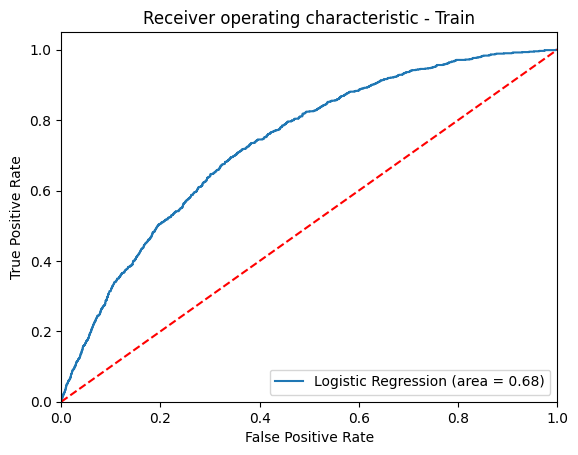

In [97]:
train_roc_auc = roc_auc_score(y_train, log2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, log2.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

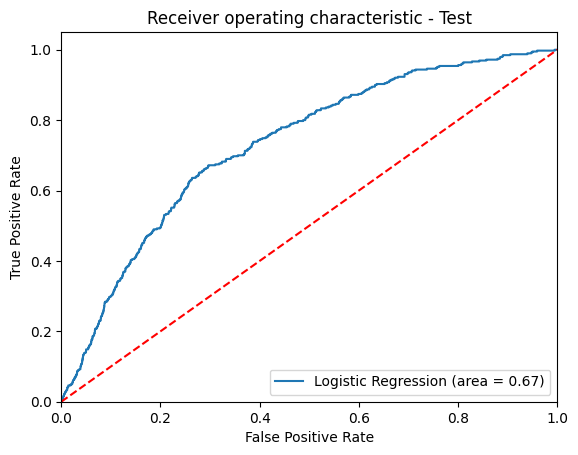

In [98]:
test_roc_auc = roc_auc_score(y_test, log2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [100]:
data = {'Model': ['Logistic Regression no SMOTE - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67


# Logistic Regression - Tuning

In [101]:
log3 = LogisticRegression(class_weight='balanced',max_iter=500,random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1', 'l2'] #'elasticnet','none'
space['C'] = [10, 1.0, 0.1, 0.01,0.001]
# define search
search = GridSearchCV(log3, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
log_result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % log_result.best_score_)
print('Best Hyperparameters: %s' % log_result.best_params_)

Best Score: 0.8327314679103058
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [102]:
y_predict_train = log_result.predict(X_train)
y_predict = log_result.predict(X_test)
train_accuracy = log_result.score(X_train,y_train)
print('Model train accuracy', train_accuracy)
test_accuracy = log_result.score(X_test, y_test)
print('Model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

Model train accuracy 0.8375060305459544
Model test accuracy 0.8277177382403204
Train confusion matrix:
[[50249 18836]
 [  203   695]]
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     69085
         1.0       0.04      0.77      0.07       898

    accuracy                           0.73     69983
   macro avg       0.52      0.75      0.45     69983
weighted avg       0.98      0.73      0.83     69983

Test confusion matrix:
[[21439  8164]
 [   82   308]]
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84     29603
         1.0       0.04      0.79      0.07       390

    accuracy                           0.73     29993
   macro avg       0.52      0.76      0.45     29993
weighted avg       0.98      0.73      0.83     29993



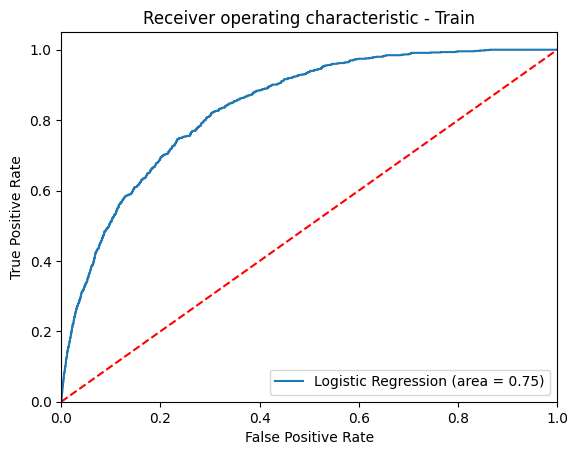

In [103]:
train_roc_auc = roc_auc_score(y_train, log_result.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, log_result.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.show()

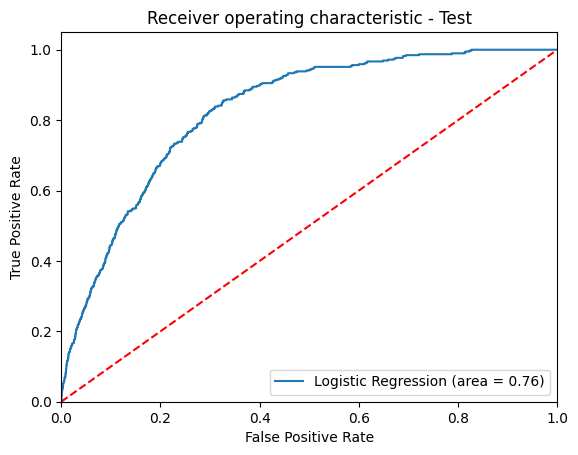

In [104]:
test_roc_auc = roc_auc_score(y_test, log_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.show()

In [105]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [106]:
data = {'Model': ['Logistic Regression - Tuned w/ roc_auc'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76


# Decision Tree - Base

In [107]:
dtc1 = DecisionTreeClassifier(random_state=42)
dtc1.fit(os_data_X,os_data_y)

DecisionTreeClassifier(random_state=42)

In [108]:
y_predict_train = dtc1.predict(os_data_X)
y_predict = dtc1.predict(X_test)
train_accuracy = dtc1.score(os_data_X, os_data_y)
print('DTC model train accuracy', train_accuracy)
test_accuracy = dtc1.score(X_test, y_test)
print('DTC model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

DTC model train accuracy 0.9975030759209669
DTC model test accuracy 0.9702930683826226
Train confusion matrix:
[[68894   191]
 [  154 68931]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     69085
         1.0       1.00      1.00      1.00     69085

    accuracy                           1.00    138170
   macro avg       1.00      1.00      1.00    138170
weighted avg       1.00      1.00      1.00    138170

Test confusion matrix:
[[29047   556]
 [  335    55]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     29603
         1.0       0.09      0.14      0.11       390

    accuracy                           0.97     29993
   macro avg       0.54      0.56      0.55     29993
weighted avg       0.98      0.97      0.97     29993



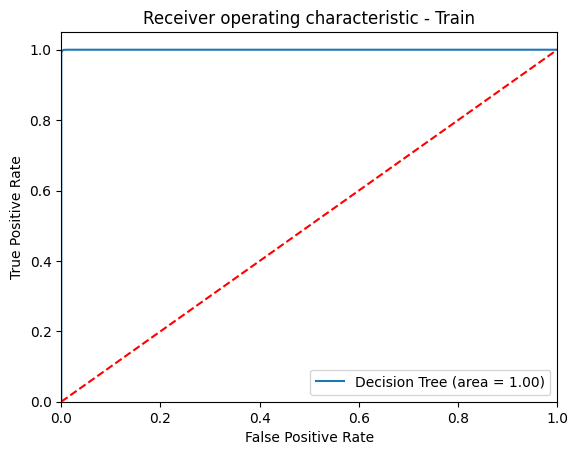

In [109]:
train_roc_auc = roc_auc_score(os_data_y, dtc1.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, dtc1.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

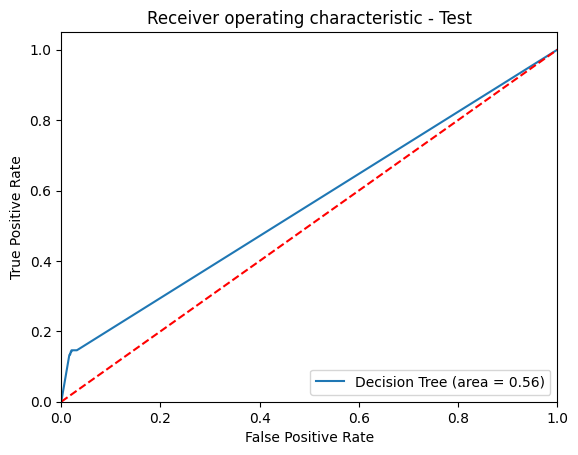

In [110]:
test_roc_auc = roc_auc_score(y_test, dtc1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

In [111]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [112]:
data = {'Model': ['Decision Tree - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56


# Decision Tree - Base wo SMOTE

In [113]:
dtc2 = DecisionTreeClassifier(class_weight='balanced',random_state=42)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [114]:
y_predict_train = dtc2.predict(X_train)
y_predict = dtc2.predict(X_test)
train_accuracy = dtc2.score(X_train, y_train)
print('DTC model train accuracy', train_accuracy)
test_accuracy = dtc2.score(X_test, y_test)
print('DTC model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

DTC model train accuracy 0.9849249103353671
DTC model test accuracy 0.9637915513619845
Train confusion matrix:
[[68030  1055]
 [    0   898]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     69085
         1.0       0.46      1.00      0.63       898

    accuracy                           0.98     69983
   macro avg       0.73      0.99      0.81     69983
weighted avg       0.99      0.98      0.99     69983

Test confusion matrix:
[[28862   741]
 [  345    45]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     29603
         1.0       0.06      0.12      0.08       390

    accuracy                           0.96     29993
   macro avg       0.52      0.55      0.53     29993
weighted avg       0.98      0.96      0.97     29993



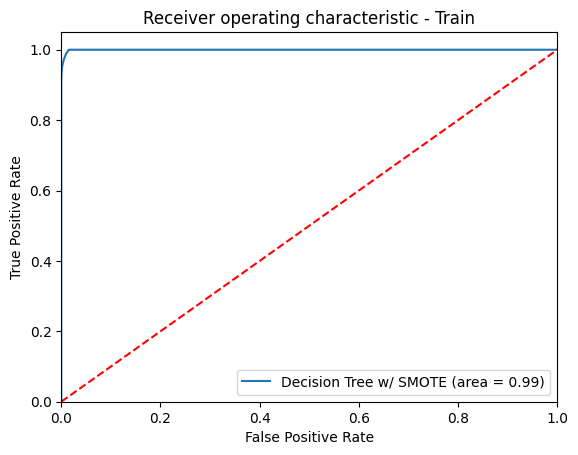

In [115]:
train_roc_auc = roc_auc_score(y_train, dtc2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, dtc2.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree w/ SMOTE (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

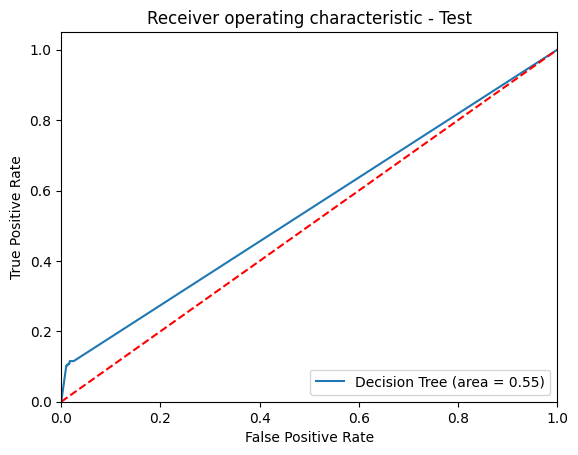

In [116]:
test_roc_auc = roc_auc_score(y_test, dtc2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

In [117]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [118]:
data = {'Model': ['Decision Tree no SMOTE- Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55


# Decision Tree - Tuning

In [119]:
dtc3 = DecisionTreeClassifier(class_weight='balanced',random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['criterion'] = ['gini']
space['max_depth'] = [4,5,6,8,10,12]
space['min_samples_leaf'] = [0.05]
space['max_features'] = ['sqrt']
# define search
search = GridSearchCV(dtc3, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
dtc_result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % dtc_result.best_score_)
print('Best Hyperparameters: %s' % dtc_result.best_params_)

Best Score: 0.7503038632243547
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.05}


In [120]:
y_predict_train = dtc_result.predict(X_train)
y_predict = dtc_result.predict(X_test)
train_accuracy = dtc_result.score(X_train, y_train)
print('DTC model train accuracy', train_accuracy)
test_accuracy = dtc_result.score(X_test, y_test)
print('DTC model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

DTC model train accuracy 0.761971252288706
DTC model test accuracy 0.7418505314343574
Train confusion matrix:
[[41626 27459]
 [  188   710]]
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75     69085
         1.0       0.03      0.79      0.05       898

    accuracy                           0.60     69983
   macro avg       0.51      0.70      0.40     69983
weighted avg       0.98      0.60      0.74     69983

Test confusion matrix:
[[17654 11949]
 [   94   296]]
              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75     29603
         1.0       0.02      0.76      0.05       390

    accuracy                           0.60     29993
   macro avg       0.51      0.68      0.40     29993
weighted avg       0.98      0.60      0.74     29993



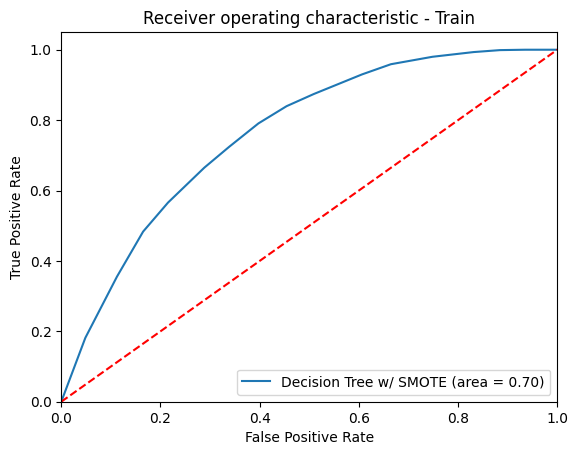

In [121]:
train_roc_auc = roc_auc_score(y_train, dtc_result.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, dtc_result.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree w/ SMOTE (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

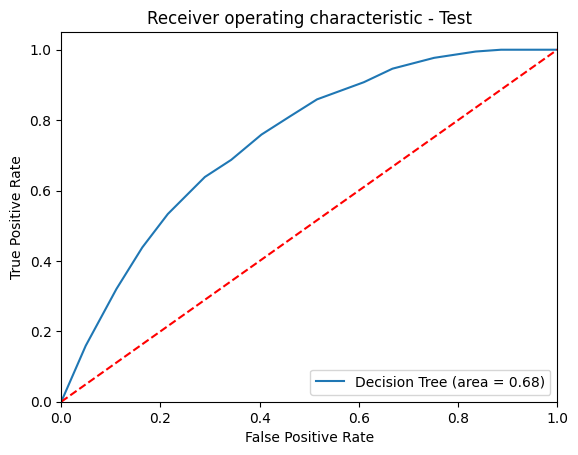

In [122]:
test_roc_auc = roc_auc_score(y_test, dtc_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

In [123]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [124]:
data = {'Model': ['Decision Tree - Tuned w/ roc_auc'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68


# Decision Tree w/ SMOTE - Tuning

In [118]:
dtc4 = DecisionTreeClassifier(class_weight='balanced',random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['criterion'] = ['gini']
space['max_depth'] = [4,5,6,8,10,12]
space['min_samples_leaf'] = [0.05]
space['max_features'] = ['sqrt']
# define search
search = GridSearchCV(dtc4, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
dtc_result2 = search.fit(os_data_X,os_data_y)
# summarize result
print('Best Score: %s' % dtc_result2.best_score_)
print('Best Hyperparameters: %s' % dtc_result2.best_params_)

Best Score: 0.8693560065349432
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.05}


In [119]:
y_predict_train = dtc_result2.predict(os_data_X)
y_predict = dtc_result2.predict(X_test)
train_accuracy = dtc_result2.score(os_data_X, os_data_y)
print('DTC model train accuracy', train_accuracy)
test_accuracy = dtc_result2.score(X_test, y_test)
print('DTC model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

DTC model train accuracy 0.8695135499524594
DTC model test accuracy 0.7311266529639666
Train confusion matrix:
[[49755 19330]
 [12772 56313]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     69085
         1.0       0.74      0.82      0.78     69085

    accuracy                           0.77    138170
   macro avg       0.77      0.77      0.77    138170
weighted avg       0.77      0.77      0.77    138170

Test confusion matrix:
[[21343  8260]
 [  152   238]]
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84     29603
         1.0       0.03      0.61      0.05       390

    accuracy                           0.72     29993
   macro avg       0.51      0.67      0.44     29993
weighted avg       0.98      0.72      0.83     29993



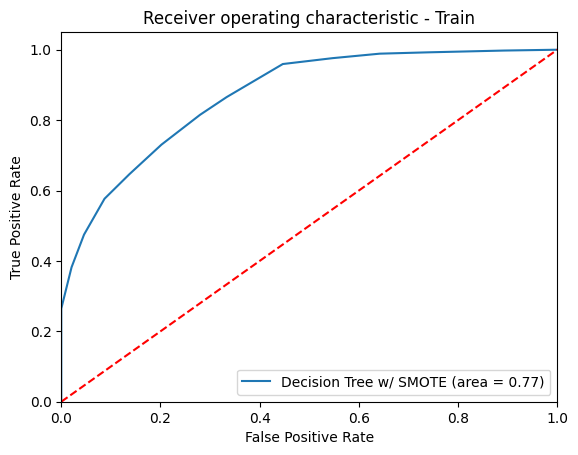

In [120]:
train_roc_auc = roc_auc_score(os_data_y, dtc_result2.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, dtc_result2.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree w/ SMOTE (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

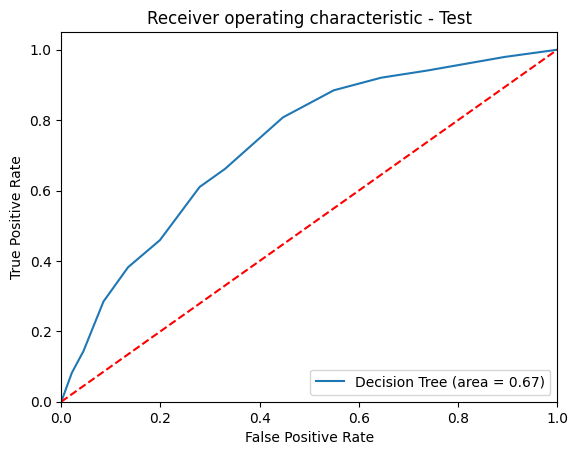

In [121]:
test_roc_auc = roc_auc_score(y_test, dtc_result2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtc_result2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

In [122]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [123]:
data = {'Model': ['Decision Tree SMOTE - Tuned w/ roc_auc'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Decision Tree SMOTE - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest SMOTE - Tuned w/ roc_auc,0.80,0.80,0.80,0.78,0.03,0.03,0.72,0.71
0,XGBoost no SMOTE - Tuned,0.91,0.85,0.93,0.83,0.04,0.04,0.83,0.77
0,Decision Tree SMOTE - Tuned w/ roc_auc,0.87,0.73,0.82,0.61,0.74,0.03,0.77,0.67


#Random Forest - Base

In [125]:
rf1 = RandomForestClassifier(n_jobs=-1)
rf1.fit(os_data_X, os_data_y)
y_predict_train = rf1.predict(os_data_X)
y_predict = rf1.predict(X_test)
train_accuracy = rf1.score(os_data_X, os_data_y)
print('LR model train accuracy', train_accuracy)
test_accuracy = rf1.score(X_test, y_test)
print('LR model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

<ipython-input-125-35d22069c9bb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(os_data_X, os_data_y)


LR model train accuracy 0.9974958384598683
LR model test accuracy 0.9812622945353916
Train confusion matrix:
[[68889   196]
 [  150 68935]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     69085
         1.0       1.00      1.00      1.00     69085

    accuracy                           1.00    138170
   macro avg       1.00      1.00      1.00    138170
weighted avg       1.00      1.00      1.00    138170

Test confusion matrix:
[[29395   208]
 [  354    36]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29603
         1.0       0.15      0.09      0.11       390

    accuracy                           0.98     29993
   macro avg       0.57      0.54      0.55     29993
weighted avg       0.98      0.98      0.98     29993



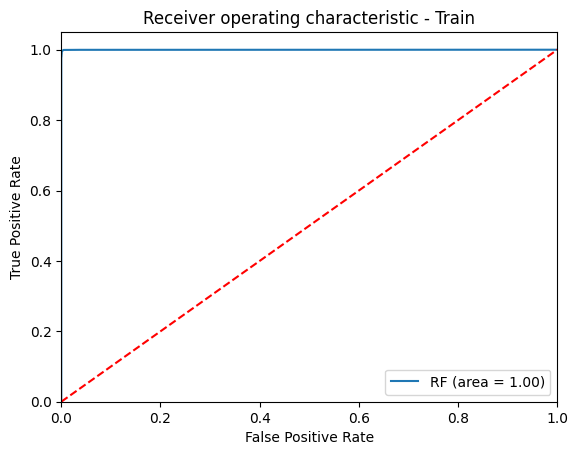

In [126]:
train_roc_auc = roc_auc_score(os_data_y, rf1.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, rf1.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

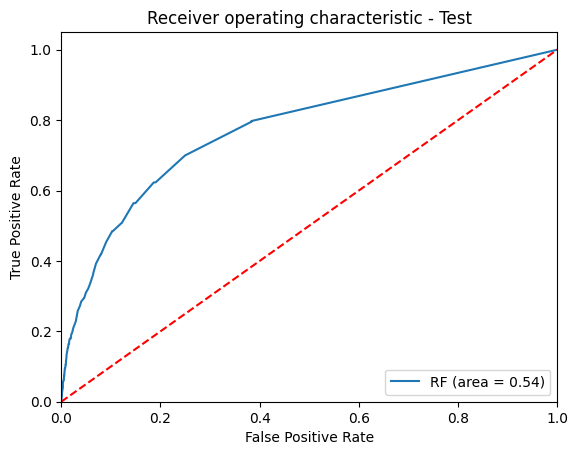

In [127]:
test_roc_auc = roc_auc_score(y_test, rf1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [128]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [129]:
data = {'Model': ['Random Forest - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54


#Random Forest - Base wo SMOTE

In [130]:
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf2.fit(X_train, y_train)
y_predict_train = rf2.predict(X_train)
y_predict = rf2.predict(X_test)
train_accuracy = rf2.score(X_train, y_train)
print('LR model train accuracy', train_accuracy)
test_accuracy = rf2.score(X_test, y_test)
print('LR model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

LR model train accuracy 0.9892259548747553
LR model test accuracy 0.976627879838629
Train confusion matrix:
[[68341   744]
 [   10   888]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     69085
         1.0       0.54      0.99      0.70       898

    accuracy                           0.99     69983
   macro avg       0.77      0.99      0.85     69983
weighted avg       0.99      0.99      0.99     69983

Test confusion matrix:
[[29272   331]
 [  370    20]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29603
         1.0       0.06      0.05      0.05       390

    accuracy                           0.98     29993
   macro avg       0.52      0.52      0.52     29993
weighted avg       0.98      0.98      0.98     29993



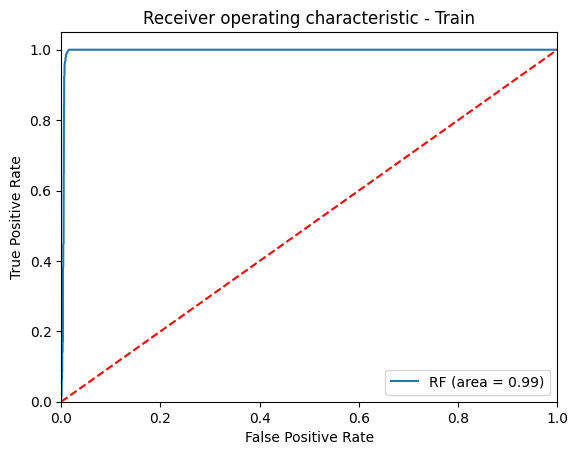

In [131]:
train_roc_auc = roc_auc_score(y_train, rf2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, rf2.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

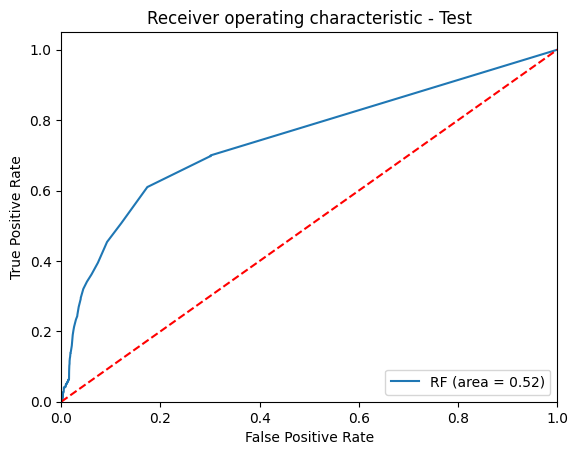

In [132]:
test_roc_auc = roc_auc_score(y_test, rf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [133]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [134]:
data = {'Model': ['Random Forest no SMOTE - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52


#Random Forest - Tuning

In [135]:
rf3 = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['criterion'] = ['gini']
space['max_depth'] = [6,8,10]
space['n_estimators'] = [100,200,500]
space['min_samples_leaf'] = [0.05]
space['max_features'] = ['sqrt']
# define search
search = GridSearchCV(rf3, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
rf_result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % rf_result.best_score_)
print('Best Hyperparameters: %s' % rf_result.best_params_)

Best Score: 0.7957649461770548
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.05, 'n_estimators': 200}


In [136]:
y_predict_train = rf_result.predict(X_train)
y_predict = rf_result.predict(X_test)
train_accuracy = rf_result.score(X_train, y_train)
print('Model train accuracy', train_accuracy)
test_accuracy = rf_result.score(X_test, y_test)
print('Model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

Model train accuracy 0.8077887815484396
Model test accuracy 0.7967453922289581
Train confusion matrix:
[[45408 23677]
 [  173   725]]
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79     69085
         1.0       0.03      0.81      0.06       898

    accuracy                           0.66     69983
   macro avg       0.51      0.73      0.42     69983
weighted avg       0.98      0.66      0.78     69983

Test confusion matrix:
[[19317 10286]
 [   78   312]]
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79     29603
         1.0       0.03      0.80      0.06       390

    accuracy                           0.65     29993
   macro avg       0.51      0.73      0.42     29993
weighted avg       0.98      0.65      0.78     29993



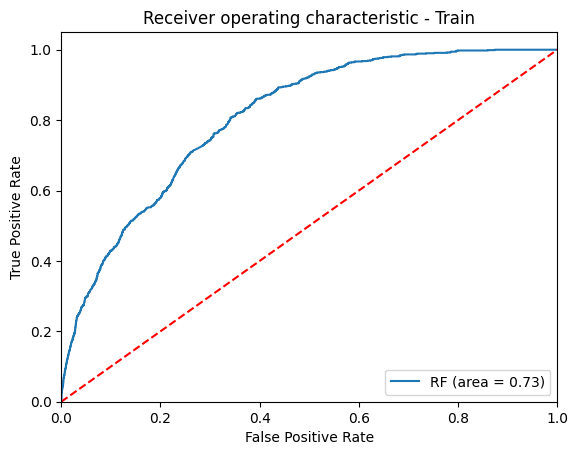

In [137]:
train_roc_auc = roc_auc_score(y_train, rf_result.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, rf_result.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

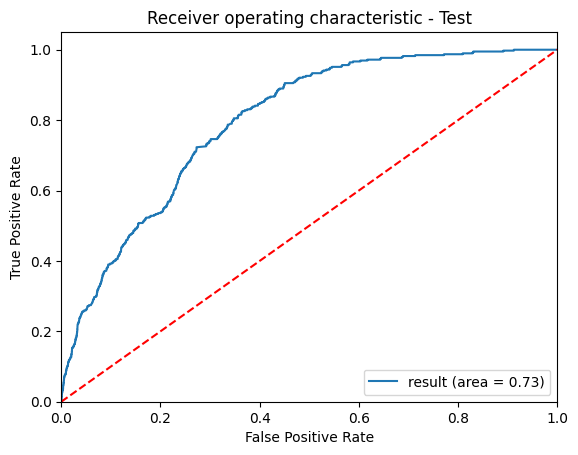

In [138]:
test_roc_auc = roc_auc_score(y_test, rf_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='result (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [139]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [140]:
data = {'Model': ['Random Forest - Tuned w/ roc_auc'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73


In [124]:
rf4 = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['criterion'] = ['gini']
space['max_depth'] = [6,8,10]
space['n_estimators'] = [100,200,500]
space['min_samples_leaf'] = [0.05]
space['max_features'] = ['sqrt']
# define search
search = GridSearchCV(rf4, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
rf_result2 = search.fit(os_data_X,os_data_y)
# summarize result
print('Best Score: %s' % rf_result2.best_score_)
print('Best Hyperparameters: %s' % rf_result2.best_params_)

KeyboardInterrupt: ignored

In [ ]:
y_predict_train = rf_result2.predict(os_data_X)
y_predict = rf_result2.predict(X_test)
train_accuracy = rf_result2.score(os_data_X, os_data_y)
print('Model train accuracy', train_accuracy)
test_accuracy = rf_result2.score(X_test, y_test)
print('Model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

In [ ]:
train_roc_auc = roc_auc_score(os_data_y, rf_result2.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, rf_result2.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [ ]:
test_roc_auc = roc_auc_score(y_test, rf_result2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_result2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='result (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [ ]:
data = {'Model': ['Random Forest SMOTE - Tuned w/ roc_auc'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

# Ada Boost - Base

In [141]:
adab1 = AdaBoostClassifier(random_state=42)
adab1.fit(os_data_X,os_data_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [142]:
y_predict_train = adab1.predict(os_data_X)
y_predict = adab1.predict(X_test)
train_accuracy = adab1.score(os_data_X, os_data_y)
print('AdaBoost model train accuracy', train_accuracy)
test_accuracy = adab1.score(X_test, y_test)
print('AdaBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

AdaBoost model train accuracy 0.8935152348556127
AdaBoost model test accuracy 0.8905411262627947
Train confusion matrix:
[[61996  7089]
 [ 7624 61461]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     69085
         1.0       0.90      0.89      0.89     69085

    accuracy                           0.89    138170
   macro avg       0.89      0.89      0.89    138170
weighted avg       0.89      0.89      0.89    138170

Test confusion matrix:
[[26571  3032]
 [  251   139]]
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     29603
         1.0       0.04      0.36      0.08       390

    accuracy                           0.89     29993
   macro avg       0.52      0.63      0.51     29993
weighted avg       0.98      0.89      0.93     29993



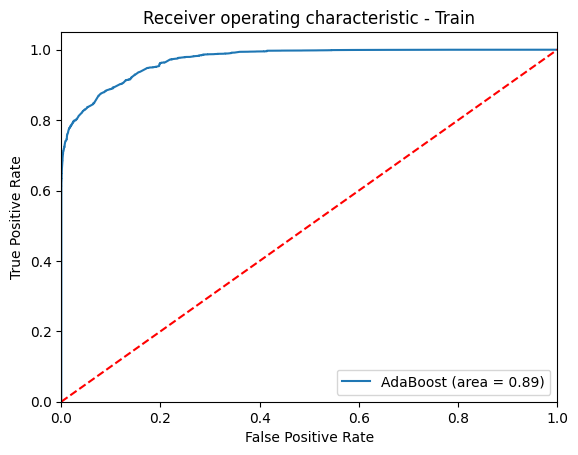

In [143]:
train_roc_auc = roc_auc_score(os_data_y, adab1.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, adab1.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

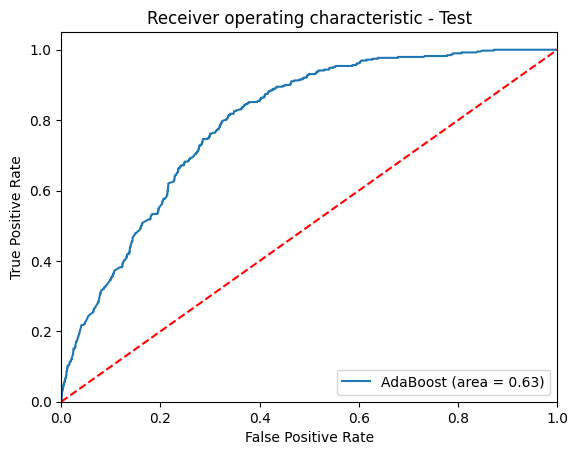

In [144]:
test_roc_auc = roc_auc_score(y_test, adab1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, adab1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

In [145]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [146]:
data = {'Model': ['AdaBoost - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73
0,AdaBoost - Base,0.89,0.89,0.89,0.36,0.90,0.04,0.89,0.63


# Ada Boost w/o SMOTE - Base

In [147]:
adab2 = AdaBoostClassifier(random_state=42)
adab2.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [148]:
y_predict_train = adab2.predict(X_train)
y_predict = adab2.predict(X_test)
train_accuracy = adab2.score(X_train, y_train)
print('AdaBoost model train accuracy', train_accuracy)
test_accuracy = adab2.score(X_test, y_test)
print('AdaBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

AdaBoost model train accuracy 0.9870825771973194
AdaBoost model test accuracy 0.9868636015070184
Train confusion matrix:
[[69077     8]
 [  896     2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     69085
         1.0       0.20      0.00      0.00       898

    accuracy                           0.99     69983
   macro avg       0.59      0.50      0.50     69983
weighted avg       0.98      0.99      0.98     69983

Test confusion matrix:
[[29599     4]
 [  390     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     29603
         1.0       0.00      0.00      0.00       390

    accuracy                           0.99     29993
   macro avg       0.49      0.50      0.50     29993
weighted avg       0.97      0.99      0.98     29993



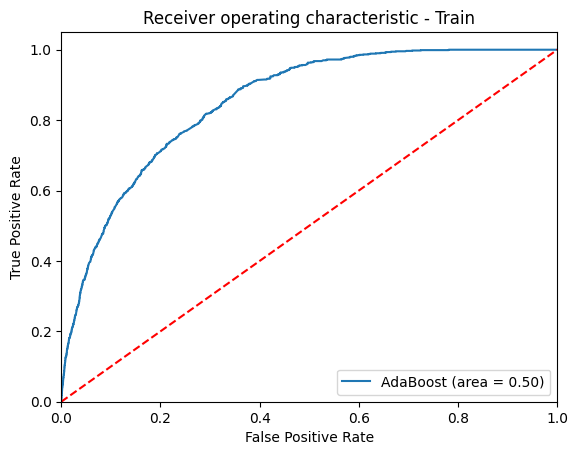

In [149]:
train_roc_auc = roc_auc_score(y_train, adab2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, adab2.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

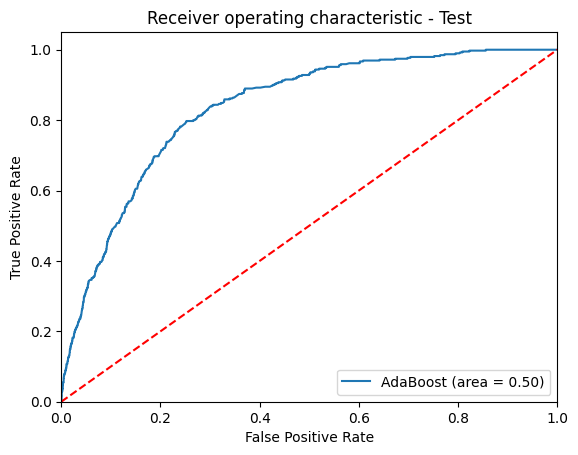

In [150]:
test_roc_auc = roc_auc_score(y_test, adab2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, adab2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

In [151]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [152]:
data = {'Model': ['AdaBoost wo SMOTE - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73
0,AdaBoost - Base,0.89,0.89,0.89,0.36,0.90,0.04,0.89,0.63


# Ada Boost Tuning

In [153]:
adab3 = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['learning_rate'] = [0.1,1]
space['n_estimators'] = [50,100]
# define search
search = GridSearchCV(adab3, space, scoring='roc_auc', cv=cv)
# execute search
adab_result = search.fit(os_data_X,os_data_y)
# summarize result
print('Best Score: %s' % adab_result.best_score_)
print('Best Hyperparameters: %s' % adab_result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Score: 0.9781860643920113
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 100}


In [154]:
y_predict_train = adab_result.predict(os_data_X)
y_predict = adab_result.predict(X_test)
train_accuracy = adab_result.score(os_data_X, os_data_y)
print('AdaBoost model train accuracy', train_accuracy)
test_accuracy = adab_result.score(X_test, y_test)
print('AdaBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

AdaBoost model train accuracy 0.9789253466599557
AdaBoost model test accuracy 0.7936719424659836
Train confusion matrix:
[[64414  4671]
 [ 7125 61960]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     69085
         1.0       0.93      0.90      0.91     69085

    accuracy                           0.91    138170
   macro avg       0.92      0.91      0.91    138170
weighted avg       0.92      0.91      0.91    138170

Test confusion matrix:
[[27585  2018]
 [  275   115]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     29603
         1.0       0.05      0.29      0.09       390

    accuracy                           0.92     29993
   macro avg       0.52      0.61      0.53     29993
weighted avg       0.98      0.92      0.95     29993



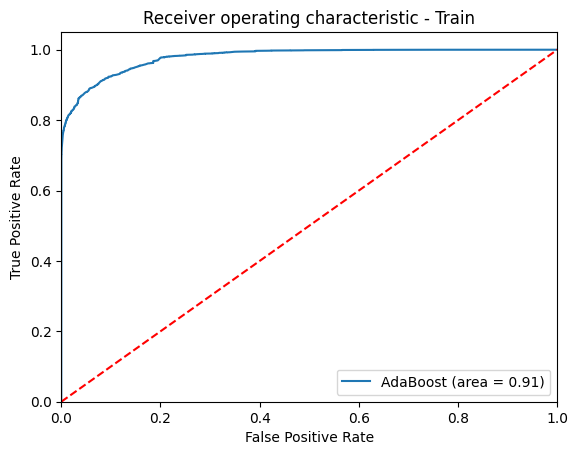

In [155]:
train_roc_auc = roc_auc_score(os_data_y, adab_result.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, adab_result.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

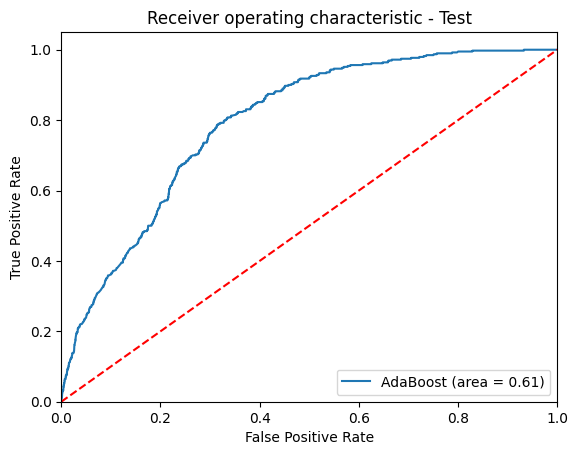

In [156]:
test_roc_auc = roc_auc_score(y_test, adab_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, adab_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('adab_ROC')
plt.show()

In [157]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [158]:
data = {'Model': ['AdaBoost w/ SMOTE - Tuned'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73
0,AdaBoost - Base,0.89,0.89,0.89,0.36,0.90,0.04,0.89,0.63


# XG Boost - Base

In [159]:
xgb1 = XGBClassifier(random_state=42)
xgb1.fit(os_data_X,os_data_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [160]:
y_predict_train = xgb1.predict(os_data_X)
y_predict = xgb1.predict(X_test)
train_accuracy = xgb1.score(os_data_X, os_data_y)
print('XGBoost model train accuracy', train_accuracy)
test_accuracy = xgb1.score(X_test, y_test)
print('XGBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(os_data_y, y_predict_train))
print(metrics.classification_report(os_data_y, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

XGBoost model train accuracy 0.9899399290728812
XGBoost model test accuracy 0.982162504584403
Train confusion matrix:
[[68798   287]
 [ 1103 67982]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     69085
         1.0       1.00      0.98      0.99     69085

    accuracy                           0.99    138170
   macro avg       0.99      0.99      0.99    138170
weighted avg       0.99      0.99      0.99    138170

Test confusion matrix:
[[29437   166]
 [  369    21]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29603
         1.0       0.11      0.05      0.07       390

    accuracy                           0.98     29993
   macro avg       0.55      0.52      0.53     29993
weighted avg       0.98      0.98      0.98     29993



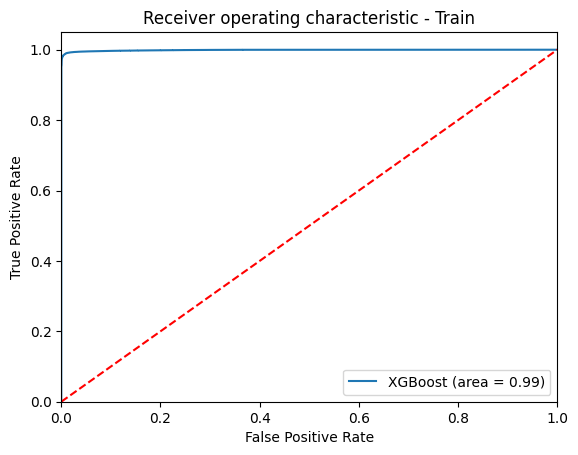

In [161]:
train_roc_auc = roc_auc_score(os_data_y, xgb1.predict(os_data_X))
fpr, tpr, thresholds = roc_curve(os_data_y, xgb1.predict_proba(os_data_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

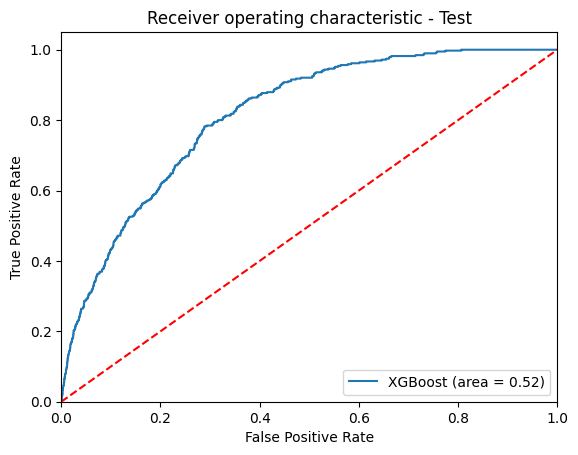

In [162]:
test_roc_auc = roc_auc_score(y_test, xgb1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

In [163]:
tn, fp, fn, tp = metrics.confusion_matrix(os_data_y,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [164]:
data = {'Model': ['XGBoost - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73
0,AdaBoost - Base,0.89,0.89,0.89,0.36,0.90,0.04,0.89,0.63


# XG Boost w/o SMOTE - Base

In [165]:
xgb2 = XGBClassifier(scale_pos_weight=99,random_state=42)
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [166]:
y_predict_train = xgb2.predict(X_train)
y_predict = xgb2.predict(X_test)
train_accuracy = xgb2.score(X_train, y_train)
print('xgb2oost model train accuracy', train_accuracy)
test_accuracy = xgb2.score(X_test, y_test)
print('XGBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

xgb2oost model train accuracy 0.8997185030650301
XGBoost model test accuracy 0.8818724369019438
Train confusion matrix:
[[62073  7012]
 [    6   892]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     69085
         1.0       0.11      0.99      0.20       898

    accuracy                           0.90     69983
   macro avg       0.56      0.95      0.57     69983
weighted avg       0.99      0.90      0.94     69983

Test confusion matrix:
[[26268  3335]
 [  208   182]]
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     29603
         1.0       0.05      0.47      0.09       390

    accuracy                           0.88     29993
   macro avg       0.52      0.68      0.51     29993
weighted avg       0.98      0.88      0.93     29993



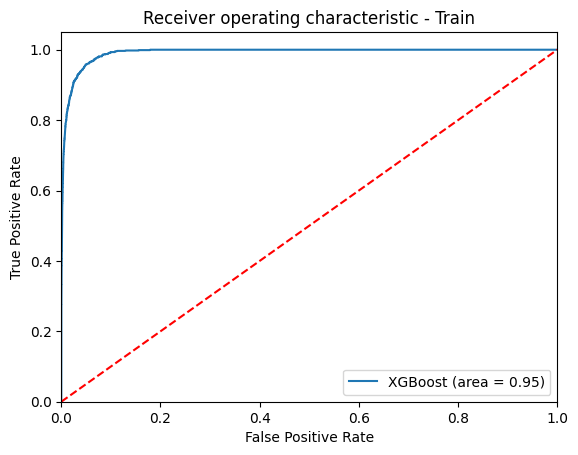

In [167]:
train_roc_auc = roc_auc_score(y_train, xgb2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, xgb2.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

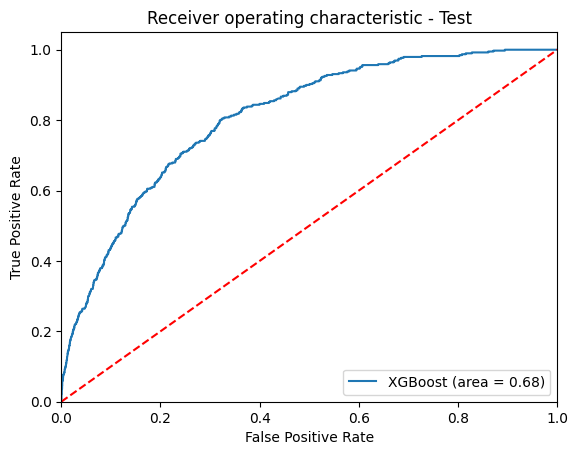

In [168]:
test_roc_auc = roc_auc_score(y_test, xgb2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

In [169]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [170]:
data = {'Model': ['XGBoost no SMOTE - Base'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Logistic Regression no SMOTE - Base,0.64,0.64,0.71,0.70,0.03,0.02,0.68,0.67
0,Logistic Regression - Tuned w/ roc_auc,0.84,0.83,0.77,0.79,0.04,0.04,0.75,0.76
0,Decision Tree - Base,1.00,0.97,1.00,0.14,1.00,0.09,1.00,0.56
0,Decision Tree no SMOTE- Base,0.98,0.96,1.00,0.12,0.46,0.06,0.99,0.55
0,Decision Tree - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest - Base,1.00,0.98,1.00,0.09,1.00,0.15,1.00,0.54
0,Random Forest no SMOTE - Base,0.99,0.98,0.99,0.05,0.54,0.06,0.99,0.52
0,Random Forest - Tuned w/ roc_auc,0.81,0.80,0.81,0.80,0.03,0.03,0.73,0.73
0,AdaBoost - Base,0.89,0.89,0.89,0.36,0.90,0.04,0.89,0.63


# XG Boost w/o SMOTE - Tuning

In [112]:
xgb3 = XGBClassifier(scale_pos_weight=99,random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['learning_rate'] = [0.1,0.3,1]
space['max_depth'] = [4,6,8]
space['subsample'] = [0.8]
space['colsample_bytree'] = [0.4]
space['n_estimators'] = [100,200,500]
space['min_samples_leaf'] = [0.05]
space['tree_method'] = ['hist']
# define search
search = GridSearchCV(xgb3, space, scoring='roc_auc', n_jobs=-1, cv=cv)
# execute search
xgb_result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % xgb_result.best_score_)
print('Best Hyperparameters: %s' % xgb_result.best_params_)

[05:48:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Best Score: 0.8429590548387953
Best Hyperparameters: {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 0.05, 'n_estimators': 100, 'subsample': 0.8, 'tree_method': 'hist'}


In [113]:
y_predict_train = xgb_result.predict(X_train)
y_predict = xgb_result.predict(X_test)
train_accuracy = xgb_result.score(X_train, y_train)
print('XGBoost model train accuracy', train_accuracy)
test_accuracy = xgb_result.score(X_test, y_test)
print('XGBoost model test accuracy',test_accuracy)
print('Train confusion matrix:')
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print('Test confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

XGBoost model train accuracy 0.9109897219992865
XGBoost model test accuracy 0.8494656206881319
Train confusion matrix:
[[49933 19152]
 [   62   836]]
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84     69085
         1.0       0.04      0.93      0.08       898

    accuracy                           0.73     69983
   macro avg       0.52      0.83      0.46     69983
weighted avg       0.99      0.73      0.83     69983

Test confusion matrix:
[[21200  8403]
 [   66   324]]
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.83     29603
         1.0       0.04      0.83      0.07       390

    accuracy                           0.72     29993
   macro avg       0.52      0.77      0.45     29993
weighted avg       0.98      0.72      0.82     29993



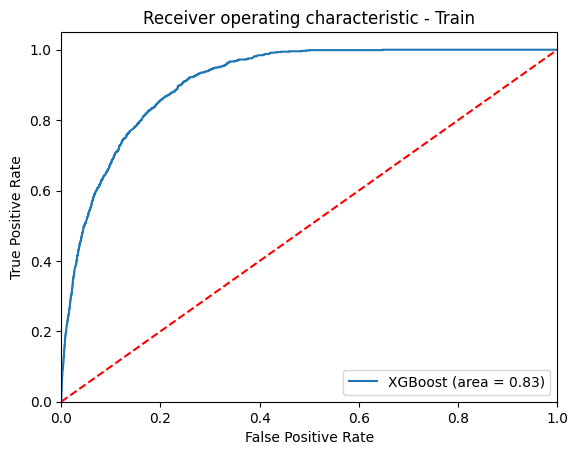

In [114]:
train_roc_auc = roc_auc_score(y_train, xgb_result.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, xgb_result.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Train')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

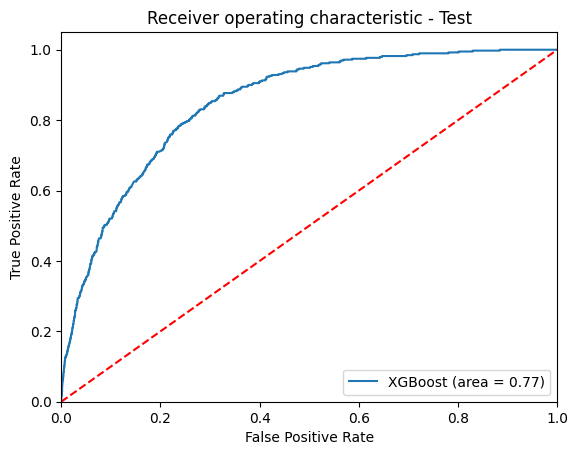

In [115]:
test_roc_auc = roc_auc_score(y_test, xgb_result.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_result.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

In [116]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_predict_train).ravel()
recall_train = tp/(tp+fn)
precision_train = tp/(tp+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_predict).ravel()
recall_test = tp/(tp+fn)
precision_test = tp/(tp+fp)

In [117]:
data = {'Model': ['XGBoost no SMOTE - Tuned'],
        'train_accuracy': [train_accuracy],
        'test_accuracy': [test_accuracy],
        'recall_train': [recall_train],
        'recall_test': [recall_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'train_auc': [train_roc_auc],
        'test_auc': [test_roc_auc]
        }

# Create DataFrame
performance_a = pd.DataFrame(data)
performance = pd.concat([performance,performance_a],axis=0)
performance

,Model,train_accuracy,test_accuracy,recall_train,recall_test,precision_train,precision_test,train_auc,test_auc
0,Logistic Regression - Base,0.66,0.62,0.70,0.72,0.65,0.02,0.66,0.67
0,Decision Tree SMOTE - Tuned w/ roc_auc,0.76,0.74,0.79,0.76,0.03,0.02,0.70,0.68
0,Random Forest SMOTE - Tuned w/ roc_auc,0.80,0.80,0.80,0.78,0.03,0.03,0.72,0.71
0,XGBoost no SMOTE - Tuned,0.91,0.85,0.93,0.83,0.04,0.04,0.83,0.77


In [129]:
fi = xgb_result.best_estimator_.feature_importances_
fn = X_train.columns
frame = {'Feature': fn,
         'Importance': fi}

# Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame)
result

,Feature,Importance
0,acct_amt_added_12_24m,0.01
1,acct_days_in_rem_12_24m,0.04
2,acct_incoming_debt_vs_paid_0_24m,0.03
3,acct_status,0.08
4,acct_worst_status_0_3m,0.07
5,acct_worst_status_12_24m,0.04
6,acct_worst_status_3_6m,0.02
7,acct_worst_status_6_12m,0.01
8,age,0.03
9,avg_payment_span_0_12m,0.02


In [130]:
topvar = ['avg_payment_span_0_3m','num_arch_ok_12_24m','acct_status','acct_worst_status_0_3m','num_active_div_by_paid_inv_0_12m']
woe_iv[woe_iv['Variable'].isin(topvar)]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,Pop %,default rate,WoE,IV
0,acct_status,0.00,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65
1,acct_status,1.00,45603,836.00,64.91,44767.00,45.36,45.61,1.83,0.36,7.00
0,acct_worst_status_0_3m,0.00,54373,452.00,35.09,53921.00,54.64,54.39,0.83,-0.44,8.65
1,acct_worst_status_0_3m,1.00,45603,836.00,64.91,44767.00,45.36,45.61,1.83,0.36,7.00
0,avg_payment_span_0_3m,0.00,49305,1029.00,79.89,48276.00,48.92,49.32,2.09,0.49,15.19
1,avg_payment_span_0_3m,1.00,50671,259.00,20.11,50412.00,51.08,50.68,0.51,-0.93,28.88
0,num_active_div_by_paid_inv_0_12m,0.00,44049,287.00,22.28,43762.00,44.34,44.06,0.65,-0.69,15.18
1,num_active_div_by_paid_inv_0_12m,1.00,26002,336.00,26.09,25666.00,26.01,26.01,1.29,0.00,0.00
2,num_active_div_by_paid_inv_0_12m,2.00,29925,665.00,51.63,29260.00,29.65,29.93,2.22,0.55,12.19
0,num_arch_ok_12_24m,0.00,31910,795.00,61.72,31115.00,31.53,31.92,2.49,0.67,20.28
